###Primer:

1. **Neural Network**:
   - A computer system that learns, inspired by how brains work
   - Made up of layers of connected "neurons" (simple calculation units)

2. **Weights**:
   - Numbers that control how strongly neurons are connected
   - The network learns by changing these numbers

3. **Learning**:
   - The process of adjusting weights to make better predictions

4. **Gradient**:
   - The direction and amount to change weights for better learning

5. **Backpropagation**:
   - A method to calculate gradients by working backwards through the network

6. **Online Learning**:
   - Learning from one piece of data at a time, instead of in big batches

7. **Non-stationary Learning**:
   - Learning when the patterns in the data keep changing over time

## Algorithms We're Comparing

1. **Weight Perturbation (WP)**:
   - Estimates gradients by making tiny changes to weights and seeing what happens
   - Like poking the network and watching how it reacts

2. **Feedback Alignment (FA)**:
   - Uses a simpler way to send learning signals backwards through the network
   - Doesn't need to know the exact connections, just uses random feedback

## Important Measurements

1. **Loss**:
   - How wrong the network's predictions are
   - Lower loss means better predictions

2. **Accuracy**:
   - The percentage of correct predictions
   - Higher is better

3. **Regret**:
   - A measure of how much worse our algorithm does compared to the best possible choice
   - Lower regret means the algorithm is doing well

4. **Variance**:
   - How much the algorithm's behavior changes each time it learns
   - High variance can make learning unstable

5. **Bias**:
   - How far off the algorithm's average behavior is from the ideal
   - Some bias is okay if it makes the algorithm more consistent

## Analysis Methods

1. **Convergence**:
   - How quickly and reliably the algorithm reaches good performance

2. **Stability**:
   - How well the algorithm maintains good performance over time

3. **Adaptation Speed**:
   - How quickly the algorithm adjusts to new patterns in the data

4. **Sample Efficiency**:
   - How much data the algorithm needs to learn effectively

5. **Computational Complexity**:
   - How much calculation the algorithm needs to do

6. **Robustness**:
   - How well the algorithm handles unexpected changes or noisy data



Weight Perturbation:

$\newcommand{\stim}{\mathbf{x}}$
$\newcommand{\noisew}{\boldsymbol \Psi}$
$\newcommand{\noiser}{\boldsymbol \xi}$
$\newcommand{\target}{y}$
$\newcommand{\targetdim}{\mathbf{y}}$
$\newcommand{\identity}{\mathbf{I}}$
$\newcommand{\blackbox}{f}$
$\newcommand{\weight}{\mathbf{W}}$
$\newcommand{\loss}{\mathcal{L}}$
$\newcommand{\derivative}[2]{\frac{d#1}{d#2}}$
$\newcommand{\rate}{\mathbf{r}}$
$\newcommand{\T}{^{\top}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}\,}$
$\newcommand{\brackets}[1]{\left(#1\right)}$
$\newcommand{\sqbrackets}[1]{\left[#1\right]}$
$\newcommand{\var}[1]{\mathbb{V}\mathrm{ar}\brackets{#1}}$

The main issue of perturbation methods is noise, meaning that across many samples of input stimuli and network perturbations, the gradient estimates will be much more variable than would be the case for backpropagation. This means that many, many more perturbations/training samples will be required to obtain an accurate gradient estimate: the consequence will be either very slow or much less effective learning.

Here, we will demonstrate the noisiness of these learning algorithms analytically for a simplified loss and network. This derivation is principally to satisfy your curiosity: no subsequent exercises will depend on your understanding of the mathematics here, and we will subsequently provide empirical evidence based on network simulations as well. First, we will work with a linear network so $\widehat\targetdim =\weight\stim$, where $\widehat\targetdim\in\RR^M$, $\weight\in\RR^{M\times N}$ and $\stim\in\RR^N$. Second, we will assume that the target output is zero $\targetdim=0$, so the loss  becomes $\loss(\weight)=\frac{1}{2}\|\weight\stim\|^2_2$. (This is equivalent to saying that $\targetdim=\weight^*\stim$ and then shifting the actual weights to be $\weight - \weight^*$; notice that here we treat the loss as a function of $\weight$, rather than $\Delta \weight$.)


With these changes, we will compute the variance of weight updates for a given input $\stim$, i.e.
\begin{equation*}
    \var{\Delta \weight}=\EE\brackets{\Delta \weight - \EE\Delta\weight}^2 = \EE\brackets{\Delta \weight}^2 - \brackets{\EE\Delta\weight}^2\,.
\end{equation*}
We already know that the $\EE\Delta\weight$ is the gradient update, so
\begin{equation}
   \brackets{\EE\Delta\weight_{ij}}^2 =  \eta^2  \brackets{\derivative{\loss}{\weight}}_{ij}^2.
\end{equation}

Therefore we only need to compute $\EE(\Delta\weight)^2$ for both algorithms.

**Weight perturbation** For a single weight $\weight_{ij}$, we can use the approximate weight change:
\begin{align}
    \Delta \weight_{ij} \,&=  - \eta \sum_{kl} \brackets{\brackets{\derivative{\loss}{\weight}}_{kl} \noisew_{kl}} \frac{\noisew_{ij}}{\sigma^2}\,,\\
    \brackets{\Delta \weight_{ij}}^2 \,&=  \frac{\eta^2}{\sigma^4} \brackets{\sum_{kl}\brackets{\derivative{\loss}{\weight}}_{kl} \noisew_{kl}}^2 \noisew_{ij}^2\\
    &=\frac{\eta^2}{\sigma^4} \brackets{\sum_{kldn}\brackets{\derivative{\loss}{\weight}}_{kl}\brackets{\derivative{\loss}{\weight}}_{dn} \noisew_{kl}\noisew_{dn}} \noisew_{ij}^2\,.
\end{align}

Now we can take the expectation of the last line w.r.t. the noise $\noisew$. Since all entries of the noise matrix are independent and zero-mean Gaussian, we will have non-zero terms in two case: $kl=dn\neq ij$ and $kl=dn=ij$:
\begin{align}
    \EE\noisew_{kl}\noisew_{dn}\noisew_{ij}^2 = \begin{cases}
        0 & k \neq d\ \mathrm{or}\ l\neq n\\
        \sigma^4 & k=d, l=n, (k\neq i\ \mathrm{or}\ l\neq j)\\
        3\,\sigma^4 & k=d=i,l=n=j
    \end{cases}
\end{align}

Therefore,
\begin{align}
    \EE_{\noisew}\brackets{\brackets{\Delta \weight_{ij}}^2} \,& = \frac{\eta^2}{\sigma^4}  \brackets{\derivative{\loss}{\weight}}_{ij}^2 \EE \noisew_{ij}^4 + \frac{\eta^2}{\sigma^4} \sum_{kl\neq ij} \brackets{\derivative{\loss}{\weight}}_{kl}^2 \EE\brackets{\noisew_{kl}^2 \noisew_{ij}^2}\\
    &=3\eta^2  \brackets{\derivative{\loss}{\weight}}_{ij}^2 + \eta^2\sum_{kl\neq ij} \brackets{\derivative{\loss}{\weight}}_{kl}^2\,,
\end{align}

where we used that the 4th central of the Gaussian $\EE \noisew_{ij}^4=3\sigma^4$.

Using the above result, we arrive at
\begin{align}
    \var{\Delta \weight_{ij}} = \eta^2  \brackets{\derivative{\loss}{\weight}}_{ij}^2 + \eta^2\sum_{kl} \brackets{\derivative{\loss}{\weight}}_{kl}^2 = O(MN)\,,
\end{align}
where the scaling comes from having $MN$ terms in the sum.

**Node perturbation** Again, for a single weight $\weight_{ij}$, we can use the approximate weight change:
\begin{align}
    \Delta \weight_{ij} \,&= -\frac{\eta}{\sigma^2}\brackets{\sum_{k}\brackets{\derivative{\loss}{\rate}}_k\noiser_k} \noiser_i\stim_j\,,\\
    \brackets{\Delta \weight_{ij}}^2 \,&= \frac{\eta^2}{\sigma^4}\brackets{\sum_{k}\brackets{\derivative{\loss}{\rate}}_k\noiser_k}^2 \noiser_i^2\stim_j^2\\
    &=\frac{\eta^2}{\sigma^4}\brackets{\sum_{k,d}\brackets{\derivative{\loss}{\rate}}_k\brackets{\derivative{\loss}{\rate}}_d\noiser_k\noiser_d} \noiser_i^2\stim_j^2\,.
\end{align}

Again, computing the expectation over the last line will make use of the independent zero-mean Gaussian noise:
\begin{align}
    \EE\noiser_k\noiser_d\noiser_i^2 = \begin{cases}
        0 & k \neq d\\
        \sigma^4 & k=d\neq i\\
        3\,\sigma^4 & k=d=i
    \end{cases}
\end{align}

Since only $k=d\neq i$ and $k=d=i$ terms will remain non-zero, we obtain
\begin{align}
    \EE_{\noiser}\brackets{\brackets{\Delta \weight_{ij}}^2} \,&= \frac{\eta^2}{\sigma^4}\brackets{\derivative{\loss}{\rate}}_i^2 \EE\brackets{\noiser_i^4}\stim_j^2 + \frac{\eta^2}{\sigma^4}\brackets{\sum_{k\neq i}\brackets{\derivative{\loss}{\rate}}_k^2\EE\brackets{\noiser_k^2 \noiser_i^2}\stim_j^2}\\
    &=3 \eta^2\brackets{\derivative{\loss}{\rate}}_i^2 \stim_j^2 + \eta^2\sum_{k\neq i}\brackets{\derivative{\loss}{\rate}}_k^2\stim_j^2\,.
\end{align}

Now since $\brackets{\EE_{\noiser}\Delta \weight_{ij}}^2=\eta^2\brackets{\derivative{\loss}{\rate}}_i^2 \stim_j^2$, we have
\begin{equation}
    \var{\Delta \weight_{ij}} = \eta^2\brackets{\derivative{\loss}{\rate}}_i^2 \stim_j^2 + \eta^2\sum_{k}\brackets{\derivative{\loss}{\rate}}_k^2\stim_j^2 = O(M)\,,
\end{equation}
where the scaling comes from the sum over $M$ outputs.

To conclude, we found that the variance of the __weight perturbation__ method scales as $O(MN)$ (variance increases if there are more inputs and/or more outputs), while the __node perturbation__ variance scales as $O(M)$ (variance increases only if there are more outputs). As such, node perturbation will scale better as the number of inputs or the number of neurons in the network increases, while weight perturbation will do worse. As we will see below, neither of these methods will scale as well as backpropagation. Becoming less effective at scale is a major problem for a learning algorithm operating in the brain, where synaptic modifications may occur in billions of neurons, and potentially trillions of synapses.

Loading MNIST data...
Starting training...
Epoch 1/3, Batch 0, Loss: 2.3018
Epoch 1/3, Batch 10, Loss: 2.3033
Epoch 1/3, Batch 20, Loss: 2.3010
Epoch 1/3, Batch 30, Loss: 2.3010
Epoch 1/3, Batch 40, Loss: 2.3025
Epoch 1/3, Batch 50, Loss: 2.3025
Epoch 1/3, Batch 60, Loss: 2.3012
Epoch 1/3, Batch 70, Loss: 2.3026
Epoch 1/3, Batch 80, Loss: 2.2999
Epoch 1/3, Batch 90, Loss: 2.2988
Epoch 1/3, Batch 100, Loss: 2.2969
Epoch 1/3, Batch 110, Loss: 2.2967
Epoch 1/3, Batch 120, Loss: 2.2983
Epoch 1/3, Batch 130, Loss: 2.2990
Epoch 1/3, Batch 140, Loss: 2.2966
Epoch 1/3, Batch 150, Loss: 2.2969
Epoch 1/3, Batch 160, Loss: 2.2950
Epoch 1/3, Batch 170, Loss: 2.2965
Epoch 1/3, Batch 180, Loss: 2.2998
Epoch 1/3, Batch 190, Loss: 2.2953
Epoch 1/3, Batch 200, Loss: 2.2953
Epoch 1/3, Batch 210, Loss: 2.2943
Epoch 1/3, Batch 220, Loss: 2.2952
Epoch 1/3, Batch 230, Loss: 2.2917
Epoch 1/3, Batch 240, Loss: 2.2916
Epoch 1/3, Batch 250, Loss: 2.2951
Epoch 1/3, Batch 260, Loss: 2.2918
Epoch 1/3, Batch 270, L

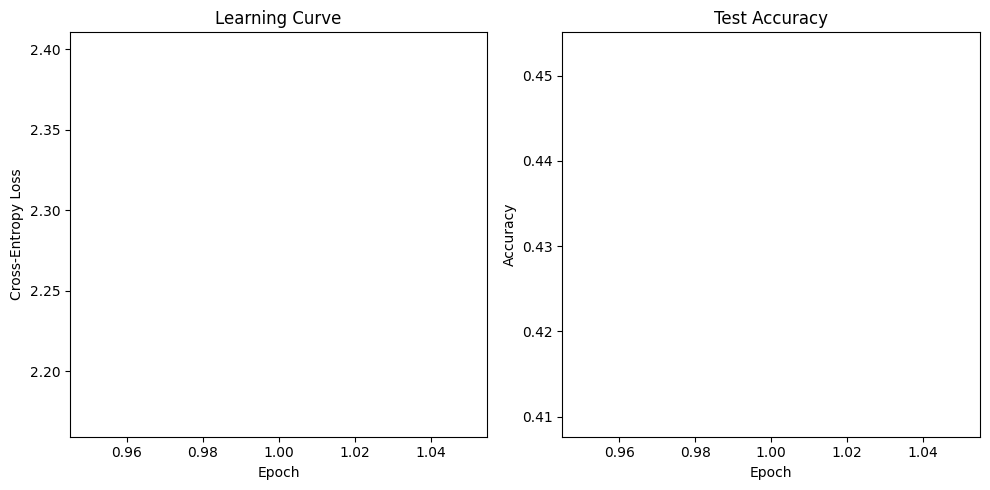

Epoch 2/3, Batch 0, Loss: 2.2671
Epoch 2/3, Batch 10, Loss: 2.2685
Epoch 2/3, Batch 20, Loss: 2.2659
Epoch 2/3, Batch 30, Loss: 2.2654
Epoch 2/3, Batch 40, Loss: 2.2692
Epoch 2/3, Batch 50, Loss: 2.2643
Epoch 2/3, Batch 60, Loss: 2.2688
Epoch 2/3, Batch 70, Loss: 2.2597
Epoch 2/3, Batch 80, Loss: 2.2607
Epoch 2/3, Batch 90, Loss: 2.2575
Epoch 2/3, Batch 100, Loss: 2.2585
Epoch 2/3, Batch 110, Loss: 2.2563
Epoch 2/3, Batch 120, Loss: 2.2630
Epoch 2/3, Batch 130, Loss: 2.2600
Epoch 2/3, Batch 140, Loss: 2.2557
Epoch 2/3, Batch 150, Loss: 2.2545
Epoch 2/3, Batch 160, Loss: 2.2595
Epoch 2/3, Batch 170, Loss: 2.2598
Epoch 2/3, Batch 180, Loss: 2.2636
Epoch 2/3, Batch 190, Loss: 2.2612
Epoch 2/3, Batch 200, Loss: 2.2500
Epoch 2/3, Batch 210, Loss: 2.2534
Epoch 2/3, Batch 220, Loss: 2.2516
Epoch 2/3, Batch 230, Loss: 2.2496
Epoch 2/3, Batch 240, Loss: 2.2469
Epoch 2/3, Batch 250, Loss: 2.2517
Epoch 2/3, Batch 260, Loss: 2.2481
Epoch 2/3, Batch 270, Loss: 2.2466
Epoch 2/3, Batch 280, Loss: 2.2

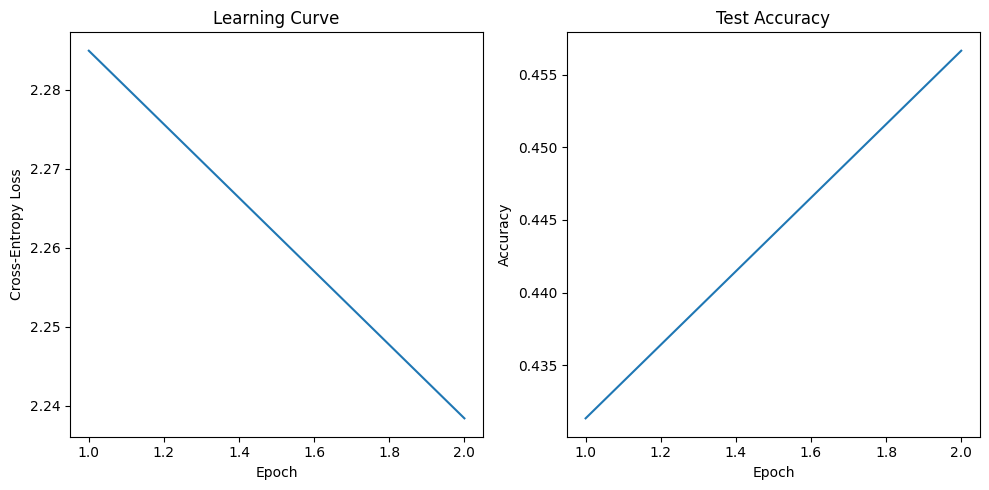

Epoch 3/3, Batch 0, Loss: 2.2148
Epoch 3/3, Batch 10, Loss: 2.2164
Epoch 3/3, Batch 20, Loss: 2.2083
Epoch 3/3, Batch 30, Loss: 2.2106
Epoch 3/3, Batch 40, Loss: 2.2182
Epoch 3/3, Batch 50, Loss: 2.2028
Epoch 3/3, Batch 60, Loss: 2.2177
Epoch 3/3, Batch 70, Loss: 2.1935
Epoch 3/3, Batch 80, Loss: 2.1961
Epoch 3/3, Batch 90, Loss: 2.1887
Epoch 3/3, Batch 100, Loss: 2.1947
Epoch 3/3, Batch 110, Loss: 2.1907
Epoch 3/3, Batch 120, Loss: 2.2094
Epoch 3/3, Batch 130, Loss: 2.1990
Epoch 3/3, Batch 140, Loss: 2.1887
Epoch 3/3, Batch 150, Loss: 2.1910
Epoch 3/3, Batch 160, Loss: 2.2000
Epoch 3/3, Batch 170, Loss: 2.1987
Epoch 3/3, Batch 180, Loss: 2.2069
Epoch 3/3, Batch 190, Loss: 2.2046
Epoch 3/3, Batch 200, Loss: 2.1768
Epoch 3/3, Batch 210, Loss: 2.1899
Epoch 3/3, Batch 220, Loss: 2.1815
Epoch 3/3, Batch 230, Loss: 2.1788
Epoch 3/3, Batch 240, Loss: 2.1711
Epoch 3/3, Batch 250, Loss: 2.1787
Epoch 3/3, Batch 260, Loss: 2.1817
Epoch 3/3, Batch 270, Loss: 2.1772
Epoch 3/3, Batch 280, Loss: 2.1

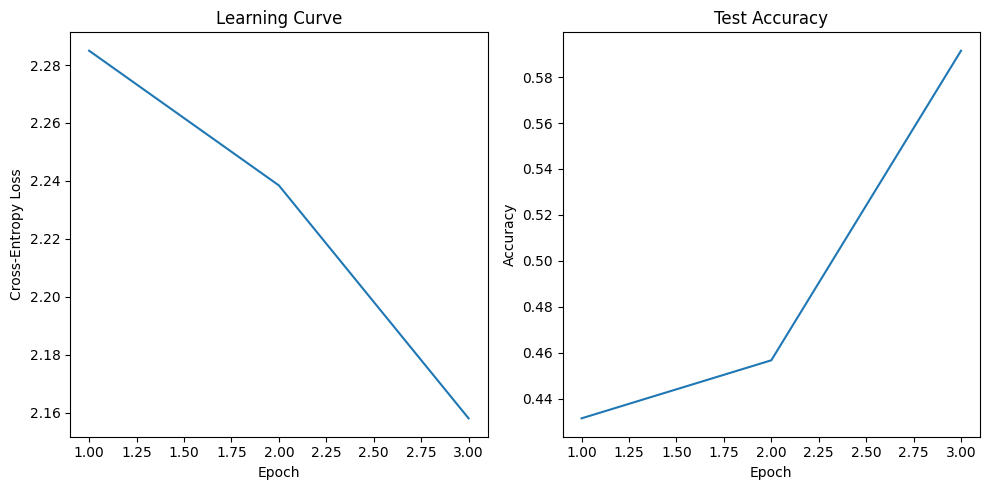

Training completed. Generating final visualizations...


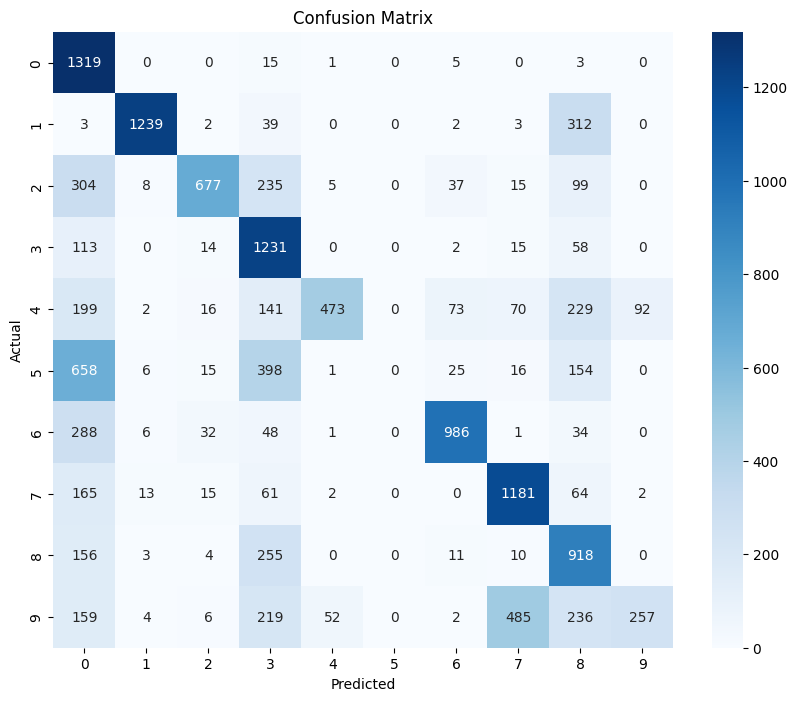

All done!


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

class WeightPerturbMLP:
    def __init__(self, input_size, hidden_size, output_size, sigma=0.01):
        self.W_h = np.random.normal(0, sigma, (input_size, hidden_size))
        self.W_y = np.random.normal(0, sigma, (hidden_size, output_size))
        self.sigma = sigma

    def forward(self, X):
        self.h = np.maximum(0, X @ self.W_h)  # ReLU activation
        self.y = self.h @ self.W_y
        return self.y

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def loss(self, X, targets):
        outputs = self.softmax(self.forward(X))
        return -np.mean(np.sum(targets * np.log(outputs + 1e-10), axis=1))

    def weight_perturbation(self, X, targets, eta, K):
        base_loss = self.loss(X, targets)

        W_h_update = np.zeros_like(self.W_h)
        W_y_update = np.zeros_like(self.W_y)

        for _ in range(K):
            Psi_h = np.random.normal(0, self.sigma, self.W_h.shape)
            Psi_y = np.random.normal(0, self.sigma, self.W_y.shape)

            W_h_perturbed = self.W_h + Psi_h
            W_y_perturbed = self.W_y + Psi_y

            self.W_h, self.W_y = W_h_perturbed, W_y_perturbed
            perturbed_loss = self.loss(X, targets)
            self.W_h, self.W_y = W_h_perturbed - Psi_h, W_y_perturbed - Psi_y

            delta_loss = perturbed_loss - base_loss

            W_h_update += (delta_loss * Psi_h) / (self.sigma**2)
            W_y_update += (delta_loss * Psi_y) / (self.sigma**2)

        W_h_update *= -eta / K
        W_y_update *= -eta / K

        return W_h_update, W_y_update

# Load and preprocess MNIST data
print("Loading MNIST data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

# Initialize model
model = WeightPerturbMLP(784, 500, 10, sigma=0.01)

# Training parameters
epochs = 3
batch_size = 64
eta = 0.001  # Reduced learning rate
K = 10  # number of perturbation samples

# Training loop
losses = []
test_accuracies = []

print("Starting training...")
for epoch in range(epochs):
    epoch_losses = []
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train_onehot[i:i+batch_size]

        W_h_update, W_y_update = model.weight_perturbation(batch_X, batch_y, eta, K)

        model.W_h += W_h_update
        model.W_y += W_y_update

        batch_loss = model.loss(batch_X, batch_y)
        epoch_losses.append(batch_loss)

        if i % (10 * batch_size) == 0:
            print(f"Epoch {epoch+1}/{epochs}, Batch {i//batch_size}, Loss: {batch_loss:.4f}")

    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)

    # Evaluate on test set
    y_pred = model.softmax(model.forward(X_test))
    accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs} completed. Avg Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.4f}")

    # Plot learning curve after each epoch
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epoch+2), losses)
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Cross-Entropy Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch+2), test_accuracies)
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

print("Training completed. Generating final visualizations...")

# Final Confusion Matrix
y_pred = model.softmax(model.forward(X_test))
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("All done!")

Loading MNIST data...


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Starting training...
Epoch 1/10, Batch 0, Loss: 2.3021
Epoch 1/10, Batch 10, Loss: 2.2996
Epoch 1/10, Batch 20, Loss: 2.2996
Epoch 1/10, Batch 30, Loss: 2.3001
Epoch 1/10, Batch 40, Loss: 2.2989
Epoch 1/10, Batch 50, Loss: 2.2991
Epoch 1/10, Batch 60, Loss: 2.2976
Epoch 1/10, Batch 70, Loss: 2.2970
Epoch 1/10, Batch 80, Loss: 2.2983
Epoch 1/10, Batch 90, Loss: 2.2964
Epoch 1/10, Batch 100, Loss: 2.2975
Epoch 1/10, Batch 110, Loss: 2.2949
Epoch 1/10, Batch 120, Loss: 2.2954
Epoch 1/10, Batch 130, Loss: 2.2960
Epoch 1/10, Batch 140, Loss: 2.2955
Epoch 1/10, Batch 150, Loss: 2.2938
Epoch 1/10, Batch 160, Loss: 2.2954
Epoch 1/10, Batch 170, Loss: 2.2950
Epoch 1/10, Batch 180, Loss: 2.2932
Epoch 1/10, Batch 190, Loss: 2.2951
Epoch 1/10, Batch 200, Loss: 2.2937
Epoch 1/10, Batch 210, Loss: 2.2922
Epoch 1/10, Batch 220, Loss: 2.2904
Epoch 1/10, Batch 230, Loss: 2.2933
Epoch 1/10, Batch 240, Loss: 2.2917
Epoch 1/10, Batch 250, Loss: 2.2928
Epoch 1/10, Batch 260, Loss: 2.2921
Epoch 1/10, Batch 

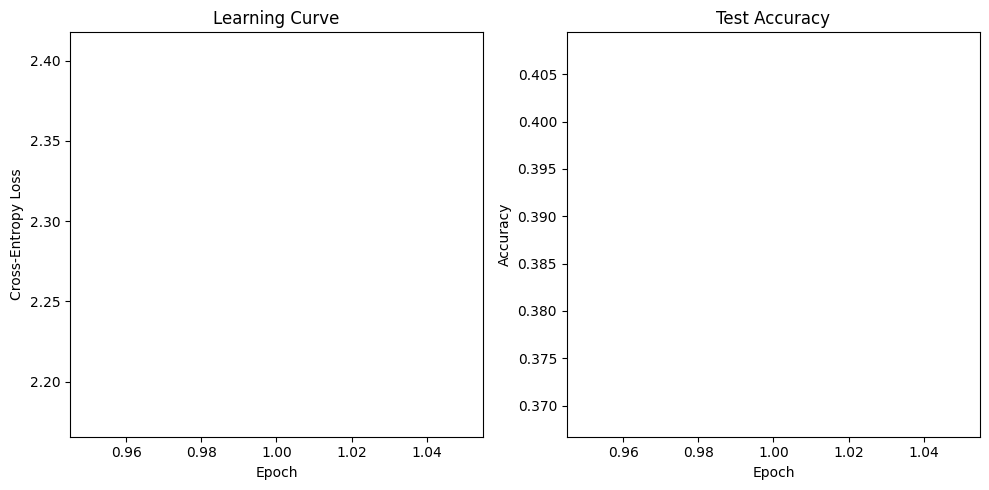

Epoch 2/10, Batch 0, Loss: 2.2835
Epoch 2/10, Batch 10, Loss: 2.2839
Epoch 2/10, Batch 20, Loss: 2.2809
Epoch 2/10, Batch 30, Loss: 2.2830
Epoch 2/10, Batch 40, Loss: 2.2796
Epoch 2/10, Batch 50, Loss: 2.2803
Epoch 2/10, Batch 60, Loss: 2.2803
Epoch 2/10, Batch 70, Loss: 2.2762
Epoch 2/10, Batch 80, Loss: 2.2821
Epoch 2/10, Batch 90, Loss: 2.2777
Epoch 2/10, Batch 100, Loss: 2.2813
Epoch 2/10, Batch 110, Loss: 2.2748
Epoch 2/10, Batch 120, Loss: 2.2751
Epoch 2/10, Batch 130, Loss: 2.2758
Epoch 2/10, Batch 140, Loss: 2.2706
Epoch 2/10, Batch 150, Loss: 2.2713
Epoch 2/10, Batch 160, Loss: 2.2761
Epoch 2/10, Batch 170, Loss: 2.2729
Epoch 2/10, Batch 180, Loss: 2.2719
Epoch 2/10, Batch 190, Loss: 2.2761
Epoch 2/10, Batch 200, Loss: 2.2725
Epoch 2/10, Batch 210, Loss: 2.2719
Epoch 2/10, Batch 220, Loss: 2.2674
Epoch 2/10, Batch 230, Loss: 2.2726
Epoch 2/10, Batch 240, Loss: 2.2719
Epoch 2/10, Batch 250, Loss: 2.2736
Epoch 2/10, Batch 260, Loss: 2.2703
Epoch 2/10, Batch 270, Loss: 2.2661
Epo

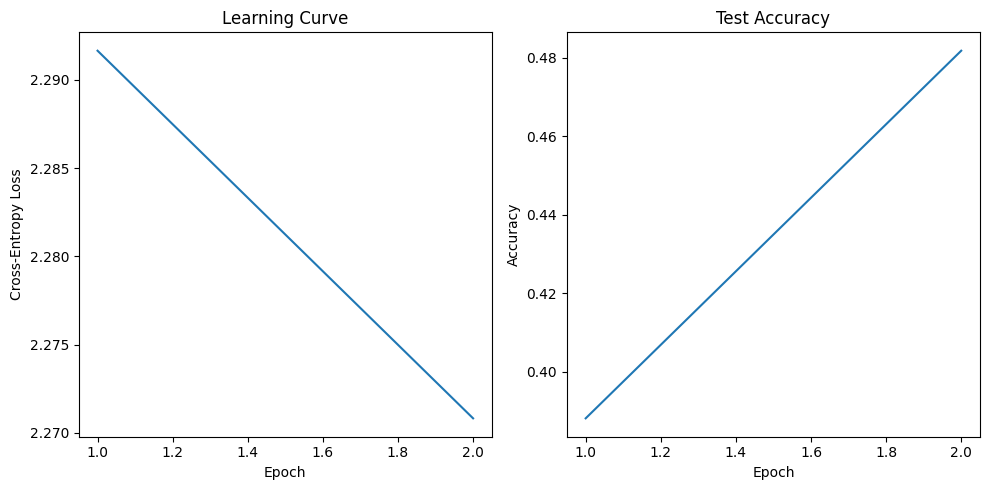

Epoch 3/10, Batch 0, Loss: 2.2597
Epoch 3/10, Batch 10, Loss: 2.2650
Epoch 3/10, Batch 20, Loss: 2.2585
Epoch 3/10, Batch 30, Loss: 2.2635
Epoch 3/10, Batch 40, Loss: 2.2558
Epoch 3/10, Batch 50, Loss: 2.2560
Epoch 3/10, Batch 60, Loss: 2.2575
Epoch 3/10, Batch 70, Loss: 2.2499
Epoch 3/10, Batch 80, Loss: 2.2612
Epoch 3/10, Batch 90, Loss: 2.2526
Epoch 3/10, Batch 100, Loss: 2.2603
Epoch 3/10, Batch 110, Loss: 2.2492
Epoch 3/10, Batch 120, Loss: 2.2495
Epoch 3/10, Batch 130, Loss: 2.2501
Epoch 3/10, Batch 140, Loss: 2.2381
Epoch 3/10, Batch 150, Loss: 2.2448
Epoch 3/10, Batch 160, Loss: 2.2529
Epoch 3/10, Batch 170, Loss: 2.2477
Epoch 3/10, Batch 180, Loss: 2.2476
Epoch 3/10, Batch 190, Loss: 2.2544
Epoch 3/10, Batch 200, Loss: 2.2462
Epoch 3/10, Batch 210, Loss: 2.2477
Epoch 3/10, Batch 220, Loss: 2.2400
Epoch 3/10, Batch 230, Loss: 2.2497
Epoch 3/10, Batch 240, Loss: 2.2483
Epoch 3/10, Batch 250, Loss: 2.2517
Epoch 3/10, Batch 260, Loss: 2.2462
Epoch 3/10, Batch 270, Loss: 2.2390
Epo

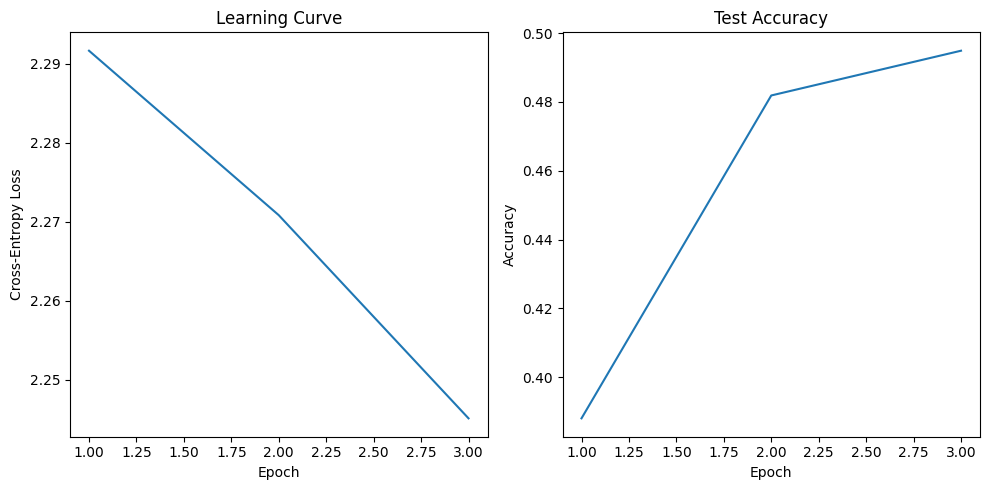

Epoch 4/10, Batch 0, Loss: 2.2293
Epoch 4/10, Batch 10, Loss: 2.2398
Epoch 4/10, Batch 20, Loss: 2.2282
Epoch 4/10, Batch 30, Loss: 2.2385
Epoch 4/10, Batch 40, Loss: 2.2267
Epoch 4/10, Batch 50, Loss: 2.2270
Epoch 4/10, Batch 60, Loss: 2.2286
Epoch 4/10, Batch 70, Loss: 2.2184
Epoch 4/10, Batch 80, Loss: 2.2338
Epoch 4/10, Batch 90, Loss: 2.2218
Epoch 4/10, Batch 100, Loss: 2.2337
Epoch 4/10, Batch 110, Loss: 2.2178
Epoch 4/10, Batch 120, Loss: 2.2218
Epoch 4/10, Batch 130, Loss: 2.2178
Epoch 4/10, Batch 140, Loss: 2.1988
Epoch 4/10, Batch 150, Loss: 2.2121
Epoch 4/10, Batch 160, Loss: 2.2244
Epoch 4/10, Batch 170, Loss: 2.2149
Epoch 4/10, Batch 180, Loss: 2.2160
Epoch 4/10, Batch 190, Loss: 2.2266
Epoch 4/10, Batch 200, Loss: 2.2128
Epoch 4/10, Batch 210, Loss: 2.2167
Epoch 4/10, Batch 220, Loss: 2.2052
Epoch 4/10, Batch 230, Loss: 2.2222
Epoch 4/10, Batch 240, Loss: 2.2204
Epoch 4/10, Batch 250, Loss: 2.2240
Epoch 4/10, Batch 260, Loss: 2.2156
Epoch 4/10, Batch 270, Loss: 2.2070
Epo

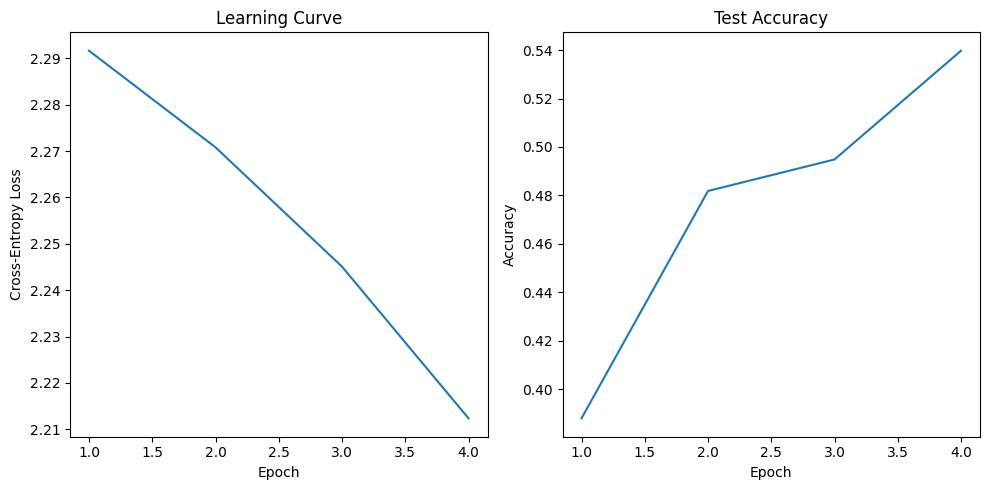

Epoch 5/10, Batch 0, Loss: 2.1917
Epoch 5/10, Batch 10, Loss: 2.2069
Epoch 5/10, Batch 20, Loss: 2.1897
Epoch 5/10, Batch 30, Loss: 2.2057
Epoch 5/10, Batch 40, Loss: 2.1891
Epoch 5/10, Batch 50, Loss: 2.1883
Epoch 5/10, Batch 60, Loss: 2.1930
Epoch 5/10, Batch 70, Loss: 2.1757
Epoch 5/10, Batch 80, Loss: 2.1998
Epoch 5/10, Batch 90, Loss: 2.1800
Epoch 5/10, Batch 100, Loss: 2.1967
Epoch 5/10, Batch 110, Loss: 2.1760
Epoch 5/10, Batch 120, Loss: 2.1788
Epoch 5/10, Batch 130, Loss: 2.1770
Epoch 5/10, Batch 140, Loss: 2.1463
Epoch 5/10, Batch 150, Loss: 2.1691
Epoch 5/10, Batch 160, Loss: 2.1805
Epoch 5/10, Batch 170, Loss: 2.1681
Epoch 5/10, Batch 180, Loss: 2.1702
Epoch 5/10, Batch 190, Loss: 2.1900
Epoch 5/10, Batch 200, Loss: 2.1693
Epoch 5/10, Batch 210, Loss: 2.1756
Epoch 5/10, Batch 220, Loss: 2.1581
Epoch 5/10, Batch 230, Loss: 2.1810
Epoch 5/10, Batch 240, Loss: 2.1822
Epoch 5/10, Batch 250, Loss: 2.1854
Epoch 5/10, Batch 260, Loss: 2.1722
Epoch 5/10, Batch 270, Loss: 2.1637
Epo

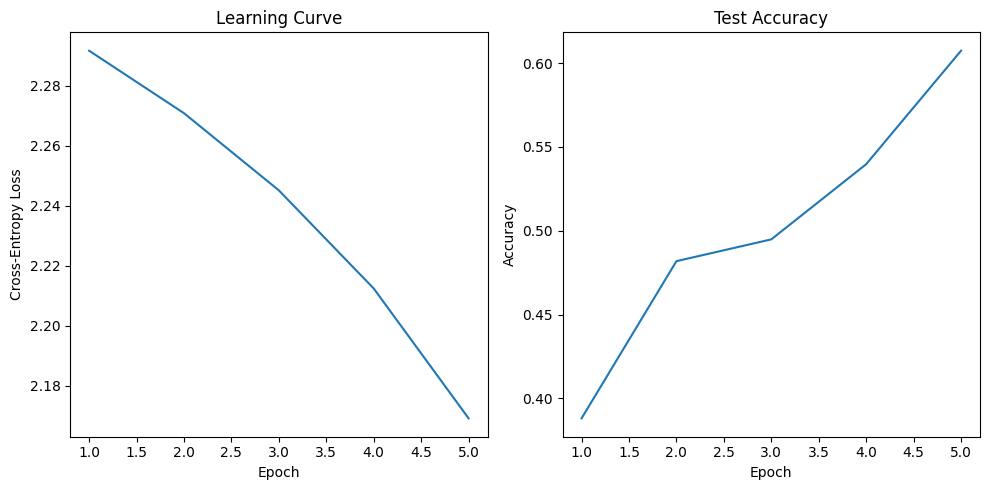

Epoch 6/10, Batch 0, Loss: 2.1419
Epoch 6/10, Batch 10, Loss: 2.1631
Epoch 6/10, Batch 20, Loss: 2.1399
Epoch 6/10, Batch 30, Loss: 2.1606
Epoch 6/10, Batch 40, Loss: 2.1378
Epoch 6/10, Batch 50, Loss: 2.1356
Epoch 6/10, Batch 60, Loss: 2.1479
Epoch 6/10, Batch 70, Loss: 2.1172
Epoch 6/10, Batch 80, Loss: 2.1539
Epoch 6/10, Batch 90, Loss: 2.1285
Epoch 6/10, Batch 100, Loss: 2.1475
Epoch 6/10, Batch 110, Loss: 2.1212
Epoch 6/10, Batch 120, Loss: 2.1277
Epoch 6/10, Batch 130, Loss: 2.1198
Epoch 6/10, Batch 140, Loss: 2.0838
Epoch 6/10, Batch 150, Loss: 2.1096
Epoch 6/10, Batch 160, Loss: 2.1263
Epoch 6/10, Batch 170, Loss: 2.1059
Epoch 6/10, Batch 180, Loss: 2.1119
Epoch 6/10, Batch 190, Loss: 2.1386
Epoch 6/10, Batch 200, Loss: 2.1067
Epoch 6/10, Batch 210, Loss: 2.1150
Epoch 6/10, Batch 220, Loss: 2.0950
Epoch 6/10, Batch 230, Loss: 2.1280
Epoch 6/10, Batch 240, Loss: 2.1281
Epoch 6/10, Batch 250, Loss: 2.1291
Epoch 6/10, Batch 260, Loss: 2.1122
Epoch 6/10, Batch 270, Loss: 2.0991
Epo

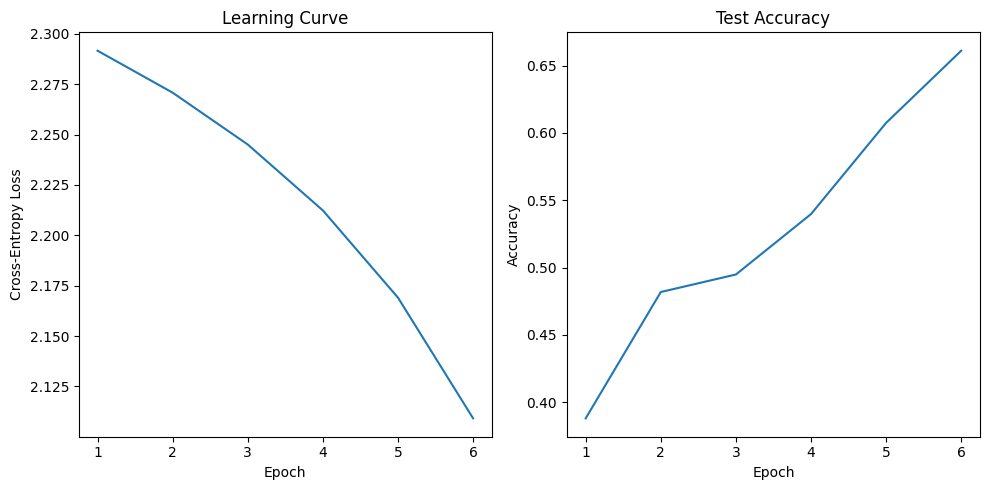

Epoch 7/10, Batch 0, Loss: 2.0773
Epoch 7/10, Batch 10, Loss: 2.1038
Epoch 7/10, Batch 20, Loss: 2.0747
Epoch 7/10, Batch 30, Loss: 2.0974
Epoch 7/10, Batch 40, Loss: 2.0639
Epoch 7/10, Batch 50, Loss: 2.0648
Epoch 7/10, Batch 60, Loss: 2.0769
Epoch 7/10, Batch 70, Loss: 2.0445
Epoch 7/10, Batch 80, Loss: 2.0895
Epoch 7/10, Batch 90, Loss: 2.0549
Epoch 7/10, Batch 100, Loss: 2.0813
Epoch 7/10, Batch 110, Loss: 2.0499
Epoch 7/10, Batch 120, Loss: 2.0528
Epoch 7/10, Batch 130, Loss: 2.0485
Epoch 7/10, Batch 140, Loss: 1.9986
Epoch 7/10, Batch 150, Loss: 2.0306
Epoch 7/10, Batch 160, Loss: 2.0501
Epoch 7/10, Batch 170, Loss: 2.0260
Epoch 7/10, Batch 180, Loss: 2.0423
Epoch 7/10, Batch 190, Loss: 2.0705
Epoch 7/10, Batch 200, Loss: 2.0229
Epoch 7/10, Batch 210, Loss: 2.0410
Epoch 7/10, Batch 220, Loss: 2.0104
Epoch 7/10, Batch 230, Loss: 2.0531
Epoch 7/10, Batch 240, Loss: 2.0488
Epoch 7/10, Batch 250, Loss: 2.0578
Epoch 7/10, Batch 260, Loss: 2.0377
Epoch 7/10, Batch 270, Loss: 2.0215
Epo

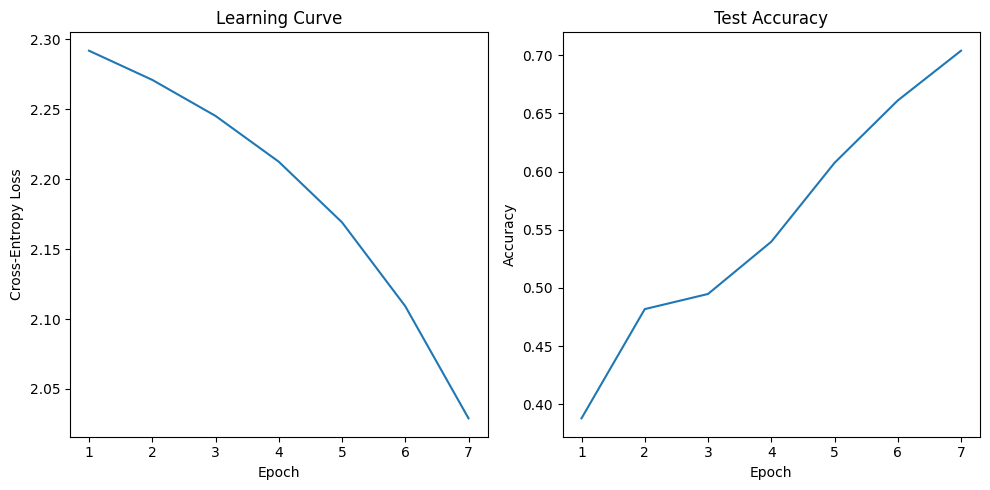

Epoch 8/10, Batch 0, Loss: 1.9761
Epoch 8/10, Batch 10, Loss: 2.0099
Epoch 8/10, Batch 20, Loss: 1.9791
Epoch 8/10, Batch 30, Loss: 2.0022
Epoch 8/10, Batch 40, Loss: 1.9603
Epoch 8/10, Batch 50, Loss: 1.9564
Epoch 8/10, Batch 60, Loss: 1.9767
Epoch 8/10, Batch 70, Loss: 1.9346
Epoch 8/10, Batch 80, Loss: 1.9828
Epoch 8/10, Batch 90, Loss: 1.9428
Epoch 8/10, Batch 100, Loss: 1.9754
Epoch 8/10, Batch 110, Loss: 1.9419
Epoch 8/10, Batch 120, Loss: 1.9512
Epoch 8/10, Batch 130, Loss: 1.9332
Epoch 8/10, Batch 140, Loss: 1.8791
Epoch 8/10, Batch 150, Loss: 1.9119
Epoch 8/10, Batch 160, Loss: 1.9402
Epoch 8/10, Batch 170, Loss: 1.9139
Epoch 8/10, Batch 180, Loss: 1.9264
Epoch 8/10, Batch 190, Loss: 1.9675
Epoch 8/10, Batch 200, Loss: 1.9066
Epoch 8/10, Batch 210, Loss: 1.9297
Epoch 8/10, Batch 220, Loss: 1.8869
Epoch 8/10, Batch 230, Loss: 1.9495
Epoch 8/10, Batch 240, Loss: 1.9331
Epoch 8/10, Batch 250, Loss: 1.9440
Epoch 8/10, Batch 260, Loss: 1.9274
Epoch 8/10, Batch 270, Loss: 1.8969
Epo

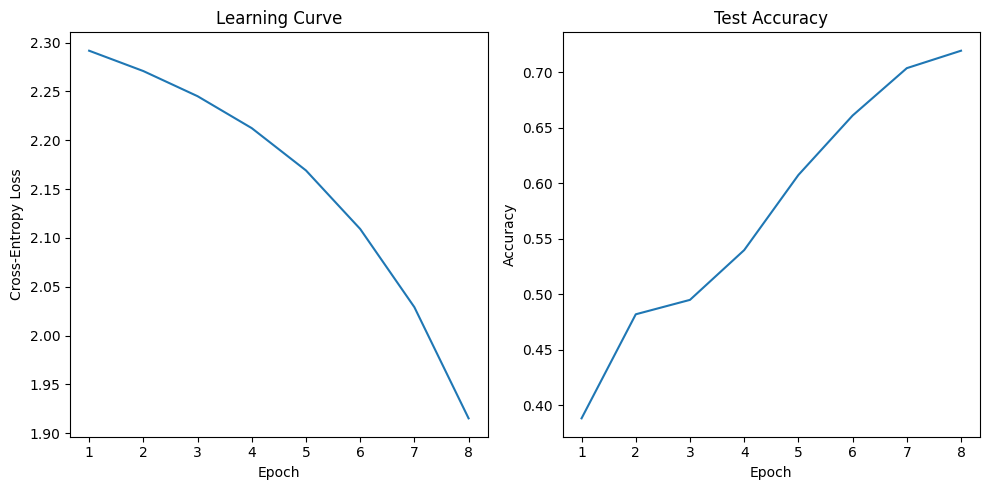

Epoch 9/10, Batch 0, Loss: 1.8540
Epoch 9/10, Batch 10, Loss: 1.9013
Epoch 9/10, Batch 20, Loss: 1.8598
Epoch 9/10, Batch 30, Loss: 1.8906
Epoch 9/10, Batch 40, Loss: 1.8316
Epoch 9/10, Batch 50, Loss: 1.8334
Epoch 9/10, Batch 60, Loss: 1.8601
Epoch 9/10, Batch 70, Loss: 1.8078
Epoch 9/10, Batch 80, Loss: 1.8634
Epoch 9/10, Batch 90, Loss: 1.8153
Epoch 9/10, Batch 100, Loss: 1.8534
Epoch 9/10, Batch 110, Loss: 1.8195
Epoch 9/10, Batch 120, Loss: 1.8338
Epoch 9/10, Batch 130, Loss: 1.8083
Epoch 9/10, Batch 140, Loss: 1.7468
Epoch 9/10, Batch 150, Loss: 1.7823
Epoch 9/10, Batch 160, Loss: 1.8180
Epoch 9/10, Batch 170, Loss: 1.7829
Epoch 9/10, Batch 180, Loss: 1.7916
Epoch 9/10, Batch 190, Loss: 1.8506
Epoch 9/10, Batch 200, Loss: 1.7675
Epoch 9/10, Batch 210, Loss: 1.7944
Epoch 9/10, Batch 220, Loss: 1.7519
Epoch 9/10, Batch 230, Loss: 1.8317
Epoch 9/10, Batch 240, Loss: 1.8124
Epoch 9/10, Batch 250, Loss: 1.8185
Epoch 9/10, Batch 260, Loss: 1.8016
Epoch 9/10, Batch 270, Loss: 1.7560
Epo

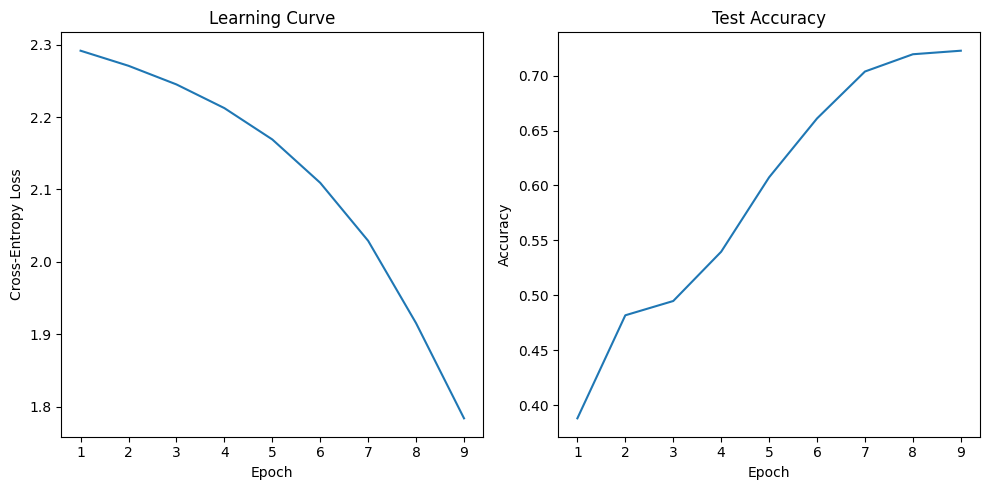

Epoch 10/10, Batch 0, Loss: 1.7096
Epoch 10/10, Batch 10, Loss: 1.7645
Epoch 10/10, Batch 20, Loss: 1.7102
Epoch 10/10, Batch 30, Loss: 1.7596
Epoch 10/10, Batch 40, Loss: 1.6932
Epoch 10/10, Batch 50, Loss: 1.7063
Epoch 10/10, Batch 60, Loss: 1.7232
Epoch 10/10, Batch 70, Loss: 1.6633
Epoch 10/10, Batch 80, Loss: 1.7253
Epoch 10/10, Batch 90, Loss: 1.6720
Epoch 10/10, Batch 100, Loss: 1.7051
Epoch 10/10, Batch 110, Loss: 1.6734
Epoch 10/10, Batch 120, Loss: 1.6959
Epoch 10/10, Batch 130, Loss: 1.6490
Epoch 10/10, Batch 140, Loss: 1.5915
Epoch 10/10, Batch 150, Loss: 1.6169
Epoch 10/10, Batch 160, Loss: 1.6625
Epoch 10/10, Batch 170, Loss: 1.6321
Epoch 10/10, Batch 180, Loss: 1.6413
Epoch 10/10, Batch 190, Loss: 1.7073
Epoch 10/10, Batch 200, Loss: 1.5941
Epoch 10/10, Batch 210, Loss: 1.6442
Epoch 10/10, Batch 220, Loss: 1.5923
Epoch 10/10, Batch 230, Loss: 1.6813
Epoch 10/10, Batch 240, Loss: 1.6520
Epoch 10/10, Batch 250, Loss: 1.6565
Epoch 10/10, Batch 260, Loss: 1.6493
Epoch 10/10,

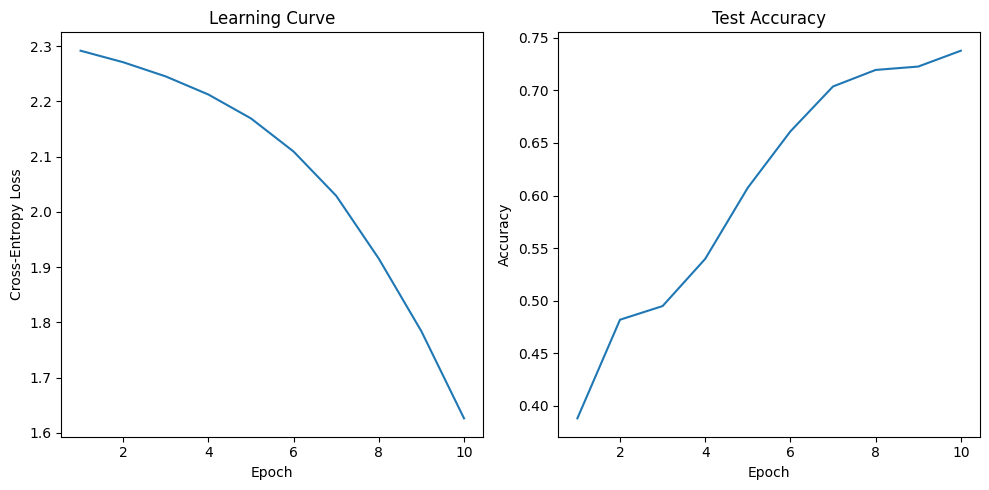

Training completed. Generating final visualizations...


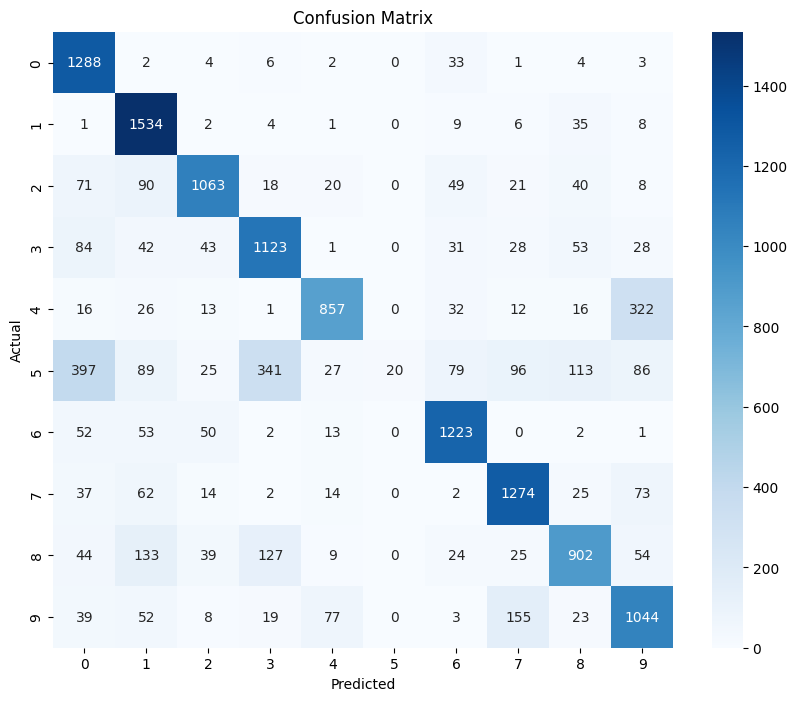

All done!


In [14]:
#WeightPerturb V2:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

class WeightPerturbMLP:
    def __init__(self, input_size, hidden_size, output_size, sigma=0.01):
        self.W_h = np.random.normal(0, sigma, (input_size, hidden_size))
        self.W_y = np.random.normal(0, sigma, (hidden_size, output_size))
        self.sigma = sigma

    def forward(self, X):
        self.h = np.maximum(0, X @ self.W_h)  # ReLU activation
        self.y = self.h @ self.W_y
        return self.y

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def loss(self, X, targets):
        outputs = self.softmax(self.forward(X))
        return -np.mean(np.sum(targets * np.log(outputs + 1e-10), axis=1))

    def weight_perturbation(self, X, targets, eta, K):
        base_loss = self.loss(X, targets)

        W_h_update = np.zeros_like(self.W_h)
        W_y_update = np.zeros_like(self.W_y)

        for _ in range(K):
            Psi_h = np.random.normal(0, self.sigma, self.W_h.shape)
            Psi_y = np.random.normal(0, self.sigma, self.W_y.shape)

            W_h_perturbed = self.W_h + Psi_h
            W_y_perturbed = self.W_y + Psi_y

            self.W_h, self.W_y = W_h_perturbed, W_y_perturbed
            perturbed_loss = self.loss(X, targets)
            self.W_h, self.W_y = W_h_perturbed - Psi_h, W_y_perturbed - Psi_y

            delta_loss = perturbed_loss - base_loss

            W_h_update += (delta_loss * Psi_h) / (self.sigma**2)
            W_y_update += (delta_loss * Psi_y) / (self.sigma**2)

        W_h_update *= -eta / K
        W_y_update *= -eta / K

        return W_h_update, W_y_update

# Load and preprocess MNIST data
print("Loading MNIST data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

# Initialize model
model = WeightPerturbMLP(784, 500, 10, sigma=0.01)

# Training parameters
epochs = 10
batch_size = 128
eta = 0.001  # Reduced learning rate
K = 10  # number of perturbation samples

# Training loop
losses = []
test_accuracies = []

print("Starting training...")
for epoch in range(epochs):
    epoch_losses = []
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train_onehot[i:i+batch_size]

        W_h_update, W_y_update = model.weight_perturbation(batch_X, batch_y, eta, K)

        model.W_h += W_h_update
        model.W_y += W_y_update

        batch_loss = model.loss(batch_X, batch_y)
        epoch_losses.append(batch_loss)

        if i % (10 * batch_size) == 0:
            print(f"Epoch {epoch+1}/{epochs}, Batch {i//batch_size}, Loss: {batch_loss:.4f}")

    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)

    # Evaluate on test set
    y_pred = model.softmax(model.forward(X_test))
    accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs} completed. Avg Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.4f}")

    # Plot learning curve after each epoch
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epoch+2), losses)
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Cross-Entropy Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch+2), test_accuracies)
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

print("Training completed. Generating final visualizations...")

# Final Confusion Matrix
y_pred = model.softmax(model.forward(X_test))
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("All done!")

Feedback Alignment:



$\newcommand{\stim}{\mathbf{x}}$
$\newcommand{\h}{\mathbf{h}}$
$\newcommand{\noisew}{\boldsymbol \Psi}$
$\newcommand{\noiser}{\boldsymbol \xi}$
$\newcommand{\target}{y}$
$\newcommand{\pred}{\mathbf{\hat{y}}}$
$\newcommand{\identity}{\mathbf{I}}$
$\newcommand{\blackbox}{f}$
$\newcommand{\weight}{\mathbf{W}}$
$\newcommand{\weightout}{\mathbf{W}^{\textrm{out}}}$
$\newcommand{\loss}{\mathcal{L}}$
$\newcommand{\derivative}[2]{\frac{\partial#1}{\partial#2}}$
$\newcommand{\rate}{\mathbf{r}}$
$\newcommand{\error}{\boldsymbol \delta}$
$\newcommand{\losserror}{\mathbf{e}}$
$\newcommand{\backweight}{\mathbf{B}}$

In this section, we describe the __Feedback Alignment__ algorithm. Unlike weight and node perturbation, feedback alignment provides a mechanism whereby individual neurons can receive *targeted* error signals. To start, we assume the following network setup:

\begin{align}
    \pred = \blackbox(\weight \stim) = \weightout\sigma(\weight\stim) =\weightout \h
\end{align}

With a mean squared error loss over all of the output neurons.
\begin{equation}
    \loss = \frac{1}{2n} \sum_{k=1}^{n}\left (\target_k - \hat{y}_k \right )^2
\end{equation}

Note here we have suppressed the batch index notation, and will calculate the following gradients as averages over batch elements.

Backpropagation updates parameters using the gradient of the loss scaled by the learning rate $\eta$.

\begin{align}
    \Delta \weight_{ji} &= - \eta \derivative{\loss}{\weight}_{ji} \\
    &= - \eta \underbrace{\derivative{\loss}{\pred}\derivative{\pred}{h_j}}_{\delta_j}\derivative{h_j}{\weight_{ji}}\\
    &= - \eta \delta_j \sigma^{\prime}(\weight\stim)_j\stim_i \\
    &= - \eta \delta_j h^{\prime}_j\stim_i
\end{align}

While $h^{\prime}_j$ and $\stim_i$ are available locally to the neuron, calculating $\delta_j$
involves non-local information, and is therefore biologically implausible.

\begin{align}
    \delta_j &= \derivative{\loss}{h_j} \\
    &= \sum_{k=1}^n \derivative{\loss}{\hat{y}_k}\derivative{\hat{y}_k}{h_j} \\
    &= \sum_{k=1}^n \overbrace{(y_k - \hat{y_k})}^{e_k} \weightout_{kj} \\
    &= e_1 {\color{red}\weightout_{1j}} + e_2 {\color{green}\weightout_{2j}} + e_3{\color{magenta}\weightout_{3j}}
\end{align}

In order to calculate $\delta_j$ we need to use all of of the outgoing weights from neuron $h_j$.

Writing $\error$ as a column vector (i.e. $\derivative{\loss}{\h}$ in  [denominator layout](https://en.wikipedia.org/wiki/Matrix_calculus#Layout_conventions)) we see that in order to calculate $\error$ we need the transpose of the forward weights.
\begin{align}
    \error &= \weight_{out}^T \losserror .
\end{align}

<img src="https://raw.githubusercontent.com/neuromatch/NeuroAI_Course/main/tutorials/W2D3_Microlearning/static/feedback_alignment.png" width="400">

*From Lillicrap et al. (2016), CC-BY*

Feedback alignment replaces $\weight_{out}^T $ with a random matrix, $\backweight$. This resolves the 'weight transport' problem, because the feedback weights are no longer the same as the feedforward weights. However, by replacing $\weight_{out}^T$ with $\backweight$, we are no longer calculating an accurate gradient! Interestingly, we will see empirically in subsequent sections that this replacement still produces reasonably good gradient estimates, though it still introduces *bias*.

Loading MNIST data...
Starting training...
Epoch 1/10, Batch 0, Loss: 0.4788
Epoch 1/10, Batch 10, Loss: 0.4258
Epoch 1/10, Batch 20, Loss: 0.3800
Epoch 1/10, Batch 30, Loss: 0.3552
Epoch 1/10, Batch 40, Loss: 0.3145
Epoch 1/10, Batch 50, Loss: 0.2933
Epoch 1/10, Batch 60, Loss: 0.2878
Epoch 1/10, Batch 70, Loss: 0.2504
Epoch 1/10, Batch 80, Loss: 0.2614
Epoch 1/10, Batch 90, Loss: 0.2415
Epoch 1/10, Batch 100, Loss: 0.2333
Epoch 1/10, Batch 110, Loss: 0.2341
Epoch 1/10, Batch 120, Loss: 0.2479
Epoch 1/10, Batch 130, Loss: 0.2112
Epoch 1/10, Batch 140, Loss: 0.2025
Epoch 1/10, Batch 150, Loss: 0.1936
Epoch 1/10, Batch 160, Loss: 0.2125
Epoch 1/10, Batch 170, Loss: 0.2011
Epoch 1/10, Batch 180, Loss: 0.1831
Epoch 1/10, Batch 190, Loss: 0.2319
Epoch 1/10, Batch 200, Loss: 0.1711
Epoch 1/10, Batch 210, Loss: 0.1934
Epoch 1/10, Batch 220, Loss: 0.1869
Epoch 1/10, Batch 230, Loss: 0.1993
Epoch 1/10, Batch 240, Loss: 0.1805
Epoch 1/10, Batch 250, Loss: 0.1699
Epoch 1/10, Batch 260, Loss: 0.1

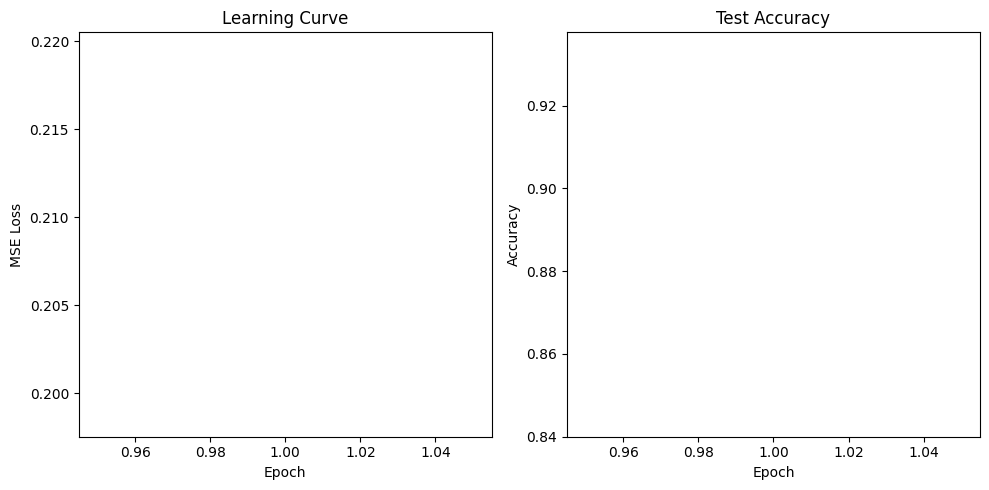

Epoch 2/10, Batch 0, Loss: 0.1367
Epoch 2/10, Batch 10, Loss: 0.1693
Epoch 2/10, Batch 20, Loss: 0.1386
Epoch 2/10, Batch 30, Loss: 0.1695
Epoch 2/10, Batch 40, Loss: 0.1439
Epoch 2/10, Batch 50, Loss: 0.1453
Epoch 2/10, Batch 60, Loss: 0.1488
Epoch 2/10, Batch 70, Loss: 0.1279
Epoch 2/10, Batch 80, Loss: 0.1369
Epoch 2/10, Batch 90, Loss: 0.1327
Epoch 2/10, Batch 100, Loss: 0.1260
Epoch 2/10, Batch 110, Loss: 0.1314
Epoch 2/10, Batch 120, Loss: 0.1577
Epoch 2/10, Batch 130, Loss: 0.1296
Epoch 2/10, Batch 140, Loss: 0.1111
Epoch 2/10, Batch 150, Loss: 0.1041
Epoch 2/10, Batch 160, Loss: 0.1319
Epoch 2/10, Batch 170, Loss: 0.1201
Epoch 2/10, Batch 180, Loss: 0.1144
Epoch 2/10, Batch 190, Loss: 0.1577
Epoch 2/10, Batch 200, Loss: 0.0973
Epoch 2/10, Batch 210, Loss: 0.1285
Epoch 2/10, Batch 220, Loss: 0.1279
Epoch 2/10, Batch 230, Loss: 0.1223
Epoch 2/10, Batch 240, Loss: 0.1125
Epoch 2/10, Batch 250, Loss: 0.1080
Epoch 2/10, Batch 260, Loss: 0.1178
Epoch 2/10, Batch 270, Loss: 0.1171
Epo

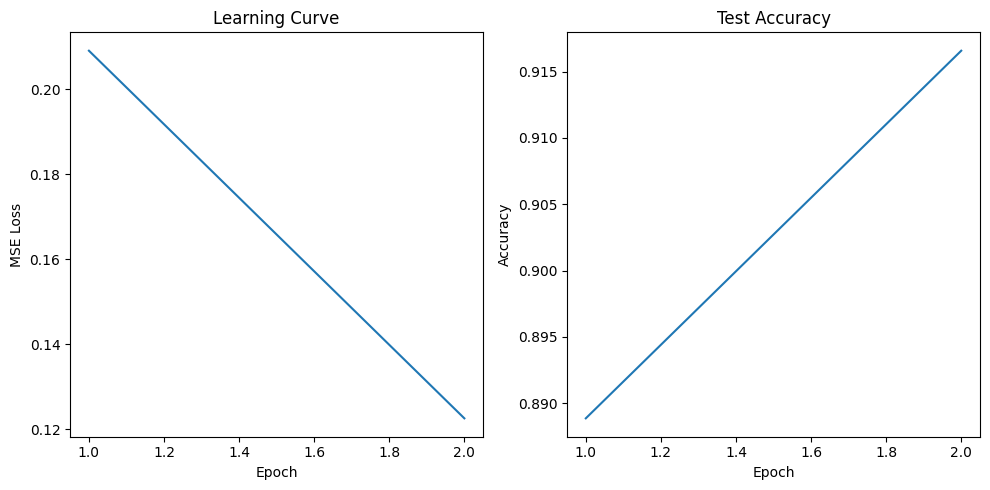

Epoch 3/10, Batch 0, Loss: 0.0992
Epoch 3/10, Batch 10, Loss: 0.1313
Epoch 3/10, Batch 20, Loss: 0.1070
Epoch 3/10, Batch 30, Loss: 0.1325
Epoch 3/10, Batch 40, Loss: 0.1121
Epoch 3/10, Batch 50, Loss: 0.1160
Epoch 3/10, Batch 60, Loss: 0.1175
Epoch 3/10, Batch 70, Loss: 0.0966
Epoch 3/10, Batch 80, Loss: 0.1057
Epoch 3/10, Batch 90, Loss: 0.1059
Epoch 3/10, Batch 100, Loss: 0.1009
Epoch 3/10, Batch 110, Loss: 0.1043
Epoch 3/10, Batch 120, Loss: 0.1312
Epoch 3/10, Batch 130, Loss: 0.1079
Epoch 3/10, Batch 140, Loss: 0.0903
Epoch 3/10, Batch 150, Loss: 0.0820
Epoch 3/10, Batch 160, Loss: 0.1107
Epoch 3/10, Batch 170, Loss: 0.0966
Epoch 3/10, Batch 180, Loss: 0.0934
Epoch 3/10, Batch 190, Loss: 0.1346
Epoch 3/10, Batch 200, Loss: 0.0759
Epoch 3/10, Batch 210, Loss: 0.1090
Epoch 3/10, Batch 220, Loss: 0.1071
Epoch 3/10, Batch 230, Loss: 0.1012
Epoch 3/10, Batch 240, Loss: 0.0913
Epoch 3/10, Batch 250, Loss: 0.0880
Epoch 3/10, Batch 260, Loss: 0.0977
Epoch 3/10, Batch 270, Loss: 0.0998
Epo

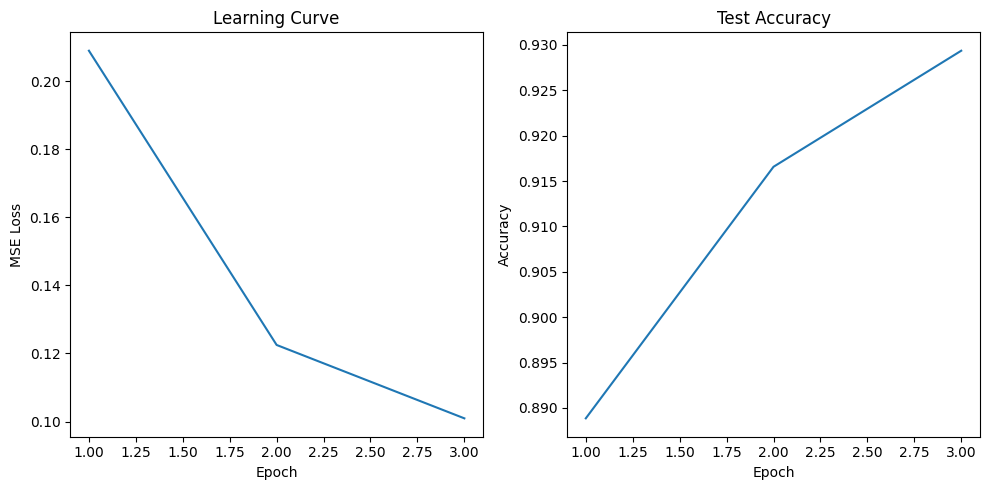

Epoch 4/10, Batch 0, Loss: 0.0849
Epoch 4/10, Batch 10, Loss: 0.1143
Epoch 4/10, Batch 20, Loss: 0.0946
Epoch 4/10, Batch 30, Loss: 0.1161
Epoch 4/10, Batch 40, Loss: 0.0976
Epoch 4/10, Batch 50, Loss: 0.1037
Epoch 4/10, Batch 60, Loss: 0.1031
Epoch 4/10, Batch 70, Loss: 0.0823
Epoch 4/10, Batch 80, Loss: 0.0921
Epoch 4/10, Batch 90, Loss: 0.0932
Epoch 4/10, Batch 100, Loss: 0.0896
Epoch 4/10, Batch 110, Loss: 0.0907
Epoch 4/10, Batch 120, Loss: 0.1174
Epoch 4/10, Batch 130, Loss: 0.0971
Epoch 4/10, Batch 140, Loss: 0.0809
Epoch 4/10, Batch 150, Loss: 0.0718
Epoch 4/10, Batch 160, Loss: 0.1000
Epoch 4/10, Batch 170, Loss: 0.0856
Epoch 4/10, Batch 180, Loss: 0.0826
Epoch 4/10, Batch 190, Loss: 0.1212
Epoch 4/10, Batch 200, Loss: 0.0661
Epoch 4/10, Batch 210, Loss: 0.0988
Epoch 4/10, Batch 220, Loss: 0.0954
Epoch 4/10, Batch 230, Loss: 0.0910
Epoch 4/10, Batch 240, Loss: 0.0818
Epoch 4/10, Batch 250, Loss: 0.0776
Epoch 4/10, Batch 260, Loss: 0.0873
Epoch 4/10, Batch 270, Loss: 0.0902
Epo

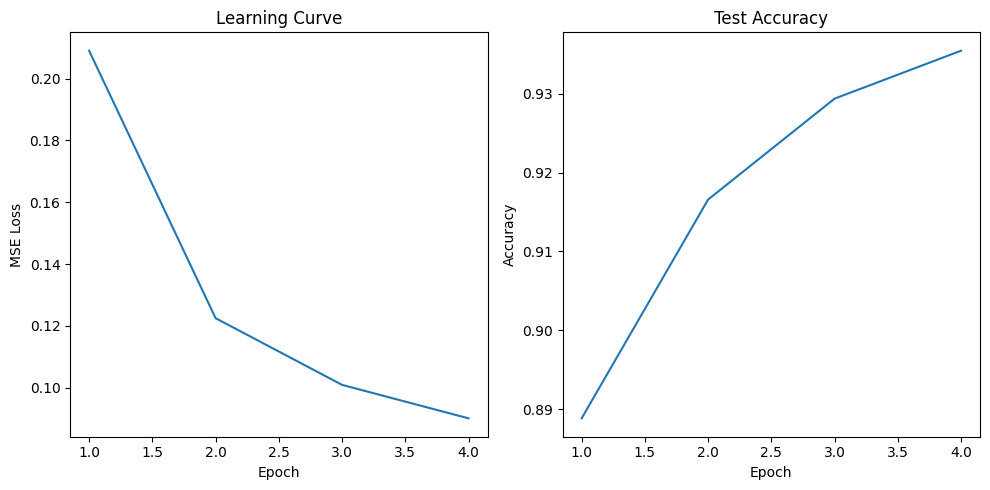

Epoch 5/10, Batch 0, Loss: 0.0768
Epoch 5/10, Batch 10, Loss: 0.1046
Epoch 5/10, Batch 20, Loss: 0.0874
Epoch 5/10, Batch 30, Loss: 0.1060
Epoch 5/10, Batch 40, Loss: 0.0888
Epoch 5/10, Batch 50, Loss: 0.0960
Epoch 5/10, Batch 60, Loss: 0.0941
Epoch 5/10, Batch 70, Loss: 0.0736
Epoch 5/10, Batch 80, Loss: 0.0842
Epoch 5/10, Batch 90, Loss: 0.0847
Epoch 5/10, Batch 100, Loss: 0.0823
Epoch 5/10, Batch 110, Loss: 0.0817
Epoch 5/10, Batch 120, Loss: 0.1082
Epoch 5/10, Batch 130, Loss: 0.0894
Epoch 5/10, Batch 140, Loss: 0.0750
Epoch 5/10, Batch 150, Loss: 0.0648
Epoch 5/10, Batch 160, Loss: 0.0925
Epoch 5/10, Batch 170, Loss: 0.0786
Epoch 5/10, Batch 180, Loss: 0.0752
Epoch 5/10, Batch 190, Loss: 0.1115
Epoch 5/10, Batch 200, Loss: 0.0603
Epoch 5/10, Batch 210, Loss: 0.0915
Epoch 5/10, Batch 220, Loss: 0.0875
Epoch 5/10, Batch 230, Loss: 0.0845
Epoch 5/10, Batch 240, Loss: 0.0756
Epoch 5/10, Batch 250, Loss: 0.0708
Epoch 5/10, Batch 260, Loss: 0.0802
Epoch 5/10, Batch 270, Loss: 0.0839
Epo

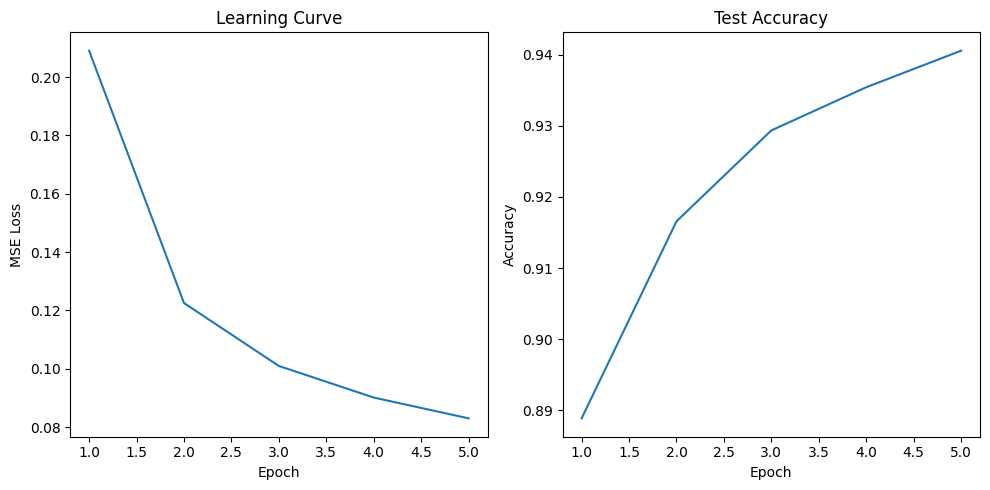

Epoch 6/10, Batch 0, Loss: 0.0713
Epoch 6/10, Batch 10, Loss: 0.0979
Epoch 6/10, Batch 20, Loss: 0.0821
Epoch 6/10, Batch 30, Loss: 0.0988
Epoch 6/10, Batch 40, Loss: 0.0825
Epoch 6/10, Batch 50, Loss: 0.0905
Epoch 6/10, Batch 60, Loss: 0.0877
Epoch 6/10, Batch 70, Loss: 0.0675
Epoch 6/10, Batch 80, Loss: 0.0791
Epoch 6/10, Batch 90, Loss: 0.0781
Epoch 6/10, Batch 100, Loss: 0.0770
Epoch 6/10, Batch 110, Loss: 0.0751
Epoch 6/10, Batch 120, Loss: 0.1015
Epoch 6/10, Batch 130, Loss: 0.0836
Epoch 6/10, Batch 140, Loss: 0.0704
Epoch 6/10, Batch 150, Loss: 0.0596
Epoch 6/10, Batch 160, Loss: 0.0869
Epoch 6/10, Batch 170, Loss: 0.0738
Epoch 6/10, Batch 180, Loss: 0.0696
Epoch 6/10, Batch 190, Loss: 0.1042
Epoch 6/10, Batch 200, Loss: 0.0564
Epoch 6/10, Batch 210, Loss: 0.0856
Epoch 6/10, Batch 220, Loss: 0.0814
Epoch 6/10, Batch 230, Loss: 0.0800
Epoch 6/10, Batch 240, Loss: 0.0711
Epoch 6/10, Batch 250, Loss: 0.0656
Epoch 6/10, Batch 260, Loss: 0.0751
Epoch 6/10, Batch 270, Loss: 0.0792
Epo

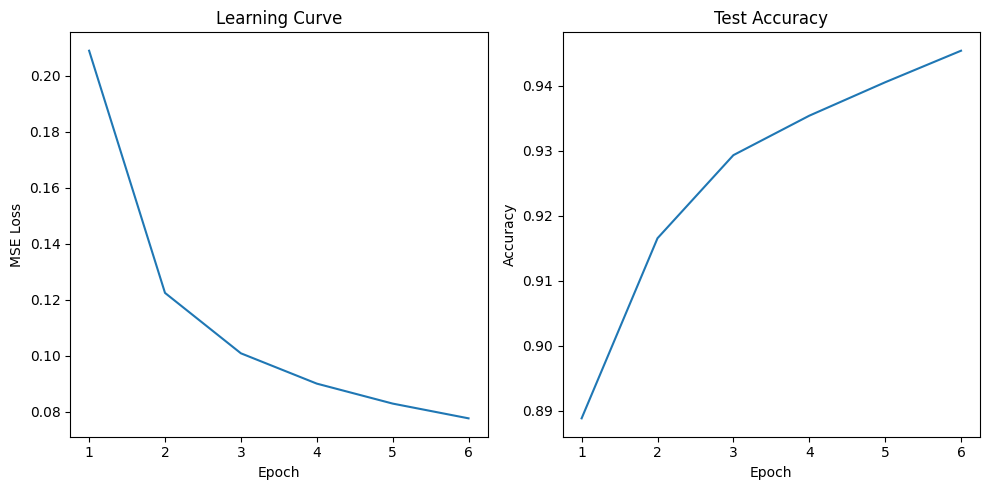

Epoch 7/10, Batch 0, Loss: 0.0668
Epoch 7/10, Batch 10, Loss: 0.0928
Epoch 7/10, Batch 20, Loss: 0.0780
Epoch 7/10, Batch 30, Loss: 0.0934
Epoch 7/10, Batch 40, Loss: 0.0778
Epoch 7/10, Batch 50, Loss: 0.0864
Epoch 7/10, Batch 60, Loss: 0.0829
Epoch 7/10, Batch 70, Loss: 0.0630
Epoch 7/10, Batch 80, Loss: 0.0751
Epoch 7/10, Batch 90, Loss: 0.0729
Epoch 7/10, Batch 100, Loss: 0.0729
Epoch 7/10, Batch 110, Loss: 0.0700
Epoch 7/10, Batch 120, Loss: 0.0962
Epoch 7/10, Batch 130, Loss: 0.0790
Epoch 7/10, Batch 140, Loss: 0.0669
Epoch 7/10, Batch 150, Loss: 0.0554
Epoch 7/10, Batch 160, Loss: 0.0822
Epoch 7/10, Batch 170, Loss: 0.0703
Epoch 7/10, Batch 180, Loss: 0.0652
Epoch 7/10, Batch 190, Loss: 0.0985
Epoch 7/10, Batch 200, Loss: 0.0534
Epoch 7/10, Batch 210, Loss: 0.0807
Epoch 7/10, Batch 220, Loss: 0.0767
Epoch 7/10, Batch 230, Loss: 0.0766
Epoch 7/10, Batch 240, Loss: 0.0674
Epoch 7/10, Batch 250, Loss: 0.0613
Epoch 7/10, Batch 260, Loss: 0.0711
Epoch 7/10, Batch 270, Loss: 0.0753
Epo

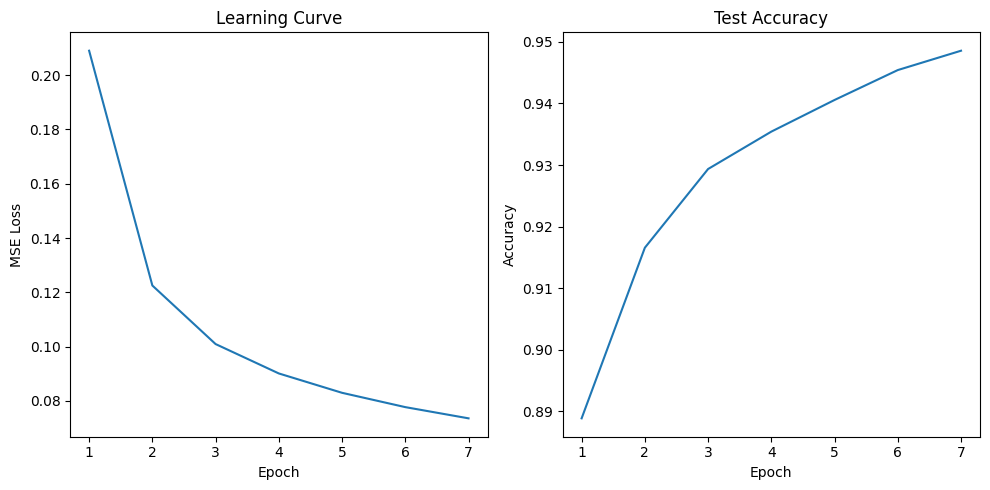

Epoch 8/10, Batch 0, Loss: 0.0632
Epoch 8/10, Batch 10, Loss: 0.0887
Epoch 8/10, Batch 20, Loss: 0.0744
Epoch 8/10, Batch 30, Loss: 0.0890
Epoch 8/10, Batch 40, Loss: 0.0741
Epoch 8/10, Batch 50, Loss: 0.0832
Epoch 8/10, Batch 60, Loss: 0.0790
Epoch 8/10, Batch 70, Loss: 0.0594
Epoch 8/10, Batch 80, Loss: 0.0719
Epoch 8/10, Batch 90, Loss: 0.0688
Epoch 8/10, Batch 100, Loss: 0.0696
Epoch 8/10, Batch 110, Loss: 0.0659
Epoch 8/10, Batch 120, Loss: 0.0919
Epoch 8/10, Batch 130, Loss: 0.0752
Epoch 8/10, Batch 140, Loss: 0.0642
Epoch 8/10, Batch 150, Loss: 0.0521
Epoch 8/10, Batch 160, Loss: 0.0782
Epoch 8/10, Batch 170, Loss: 0.0673
Epoch 8/10, Batch 180, Loss: 0.0614
Epoch 8/10, Batch 190, Loss: 0.0938
Epoch 8/10, Batch 200, Loss: 0.0511
Epoch 8/10, Batch 210, Loss: 0.0765
Epoch 8/10, Batch 220, Loss: 0.0729
Epoch 8/10, Batch 230, Loss: 0.0739
Epoch 8/10, Batch 240, Loss: 0.0644
Epoch 8/10, Batch 250, Loss: 0.0578
Epoch 8/10, Batch 260, Loss: 0.0680
Epoch 8/10, Batch 270, Loss: 0.0721
Epo

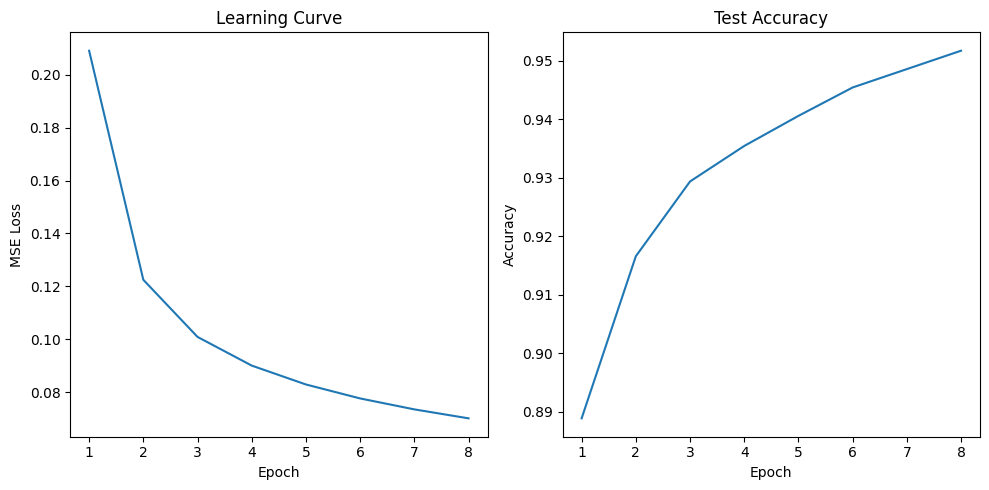

Epoch 9/10, Batch 0, Loss: 0.0601
Epoch 9/10, Batch 10, Loss: 0.0853
Epoch 9/10, Batch 20, Loss: 0.0714
Epoch 9/10, Batch 30, Loss: 0.0853
Epoch 9/10, Batch 40, Loss: 0.0710
Epoch 9/10, Batch 50, Loss: 0.0803
Epoch 9/10, Batch 60, Loss: 0.0760
Epoch 9/10, Batch 70, Loss: 0.0563
Epoch 9/10, Batch 80, Loss: 0.0691
Epoch 9/10, Batch 90, Loss: 0.0655
Epoch 9/10, Batch 100, Loss: 0.0670
Epoch 9/10, Batch 110, Loss: 0.0626
Epoch 9/10, Batch 120, Loss: 0.0884
Epoch 9/10, Batch 130, Loss: 0.0720
Epoch 9/10, Batch 140, Loss: 0.0620
Epoch 9/10, Batch 150, Loss: 0.0495
Epoch 9/10, Batch 160, Loss: 0.0749
Epoch 9/10, Batch 170, Loss: 0.0649
Epoch 9/10, Batch 180, Loss: 0.0582
Epoch 9/10, Batch 190, Loss: 0.0900
Epoch 9/10, Batch 200, Loss: 0.0492
Epoch 9/10, Batch 210, Loss: 0.0729
Epoch 9/10, Batch 220, Loss: 0.0697
Epoch 9/10, Batch 230, Loss: 0.0718
Epoch 9/10, Batch 240, Loss: 0.0619
Epoch 9/10, Batch 250, Loss: 0.0548
Epoch 9/10, Batch 260, Loss: 0.0653
Epoch 9/10, Batch 270, Loss: 0.0695
Epo

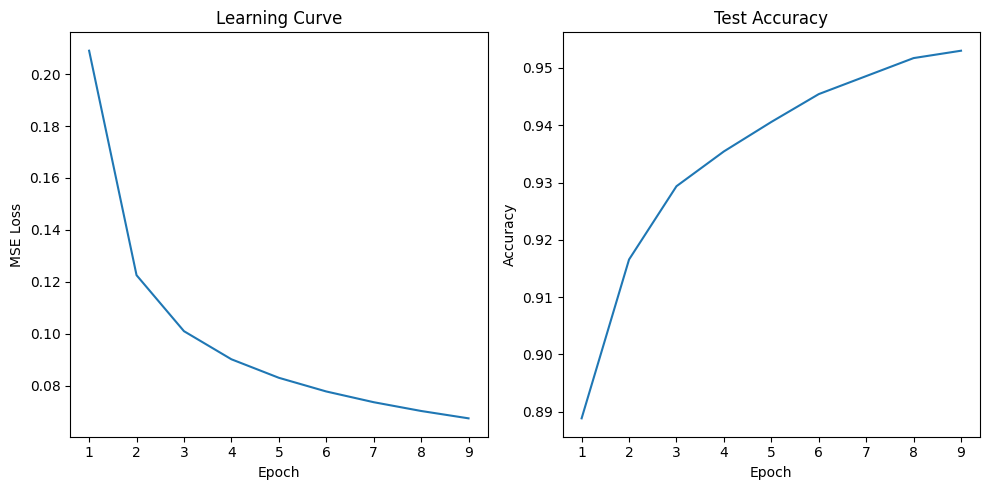

Epoch 10/10, Batch 0, Loss: 0.0575
Epoch 10/10, Batch 10, Loss: 0.0822
Epoch 10/10, Batch 20, Loss: 0.0688
Epoch 10/10, Batch 30, Loss: 0.0822
Epoch 10/10, Batch 40, Loss: 0.0682
Epoch 10/10, Batch 50, Loss: 0.0779
Epoch 10/10, Batch 60, Loss: 0.0734
Epoch 10/10, Batch 70, Loss: 0.0537
Epoch 10/10, Batch 80, Loss: 0.0667
Epoch 10/10, Batch 90, Loss: 0.0626
Epoch 10/10, Batch 100, Loss: 0.0648
Epoch 10/10, Batch 110, Loss: 0.0599
Epoch 10/10, Batch 120, Loss: 0.0856
Epoch 10/10, Batch 130, Loss: 0.0692
Epoch 10/10, Batch 140, Loss: 0.0603
Epoch 10/10, Batch 150, Loss: 0.0473
Epoch 10/10, Batch 160, Loss: 0.0720
Epoch 10/10, Batch 170, Loss: 0.0628
Epoch 10/10, Batch 180, Loss: 0.0555
Epoch 10/10, Batch 190, Loss: 0.0868
Epoch 10/10, Batch 200, Loss: 0.0477
Epoch 10/10, Batch 210, Loss: 0.0699
Epoch 10/10, Batch 220, Loss: 0.0672
Epoch 10/10, Batch 230, Loss: 0.0699
Epoch 10/10, Batch 240, Loss: 0.0598
Epoch 10/10, Batch 250, Loss: 0.0522
Epoch 10/10, Batch 260, Loss: 0.0630
Epoch 10/10,

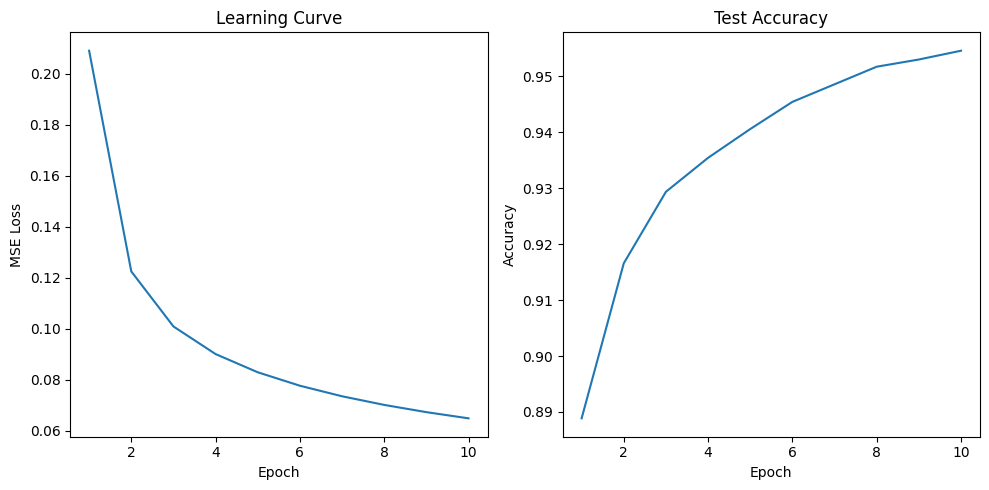

Training completed. Generating final visualizations...


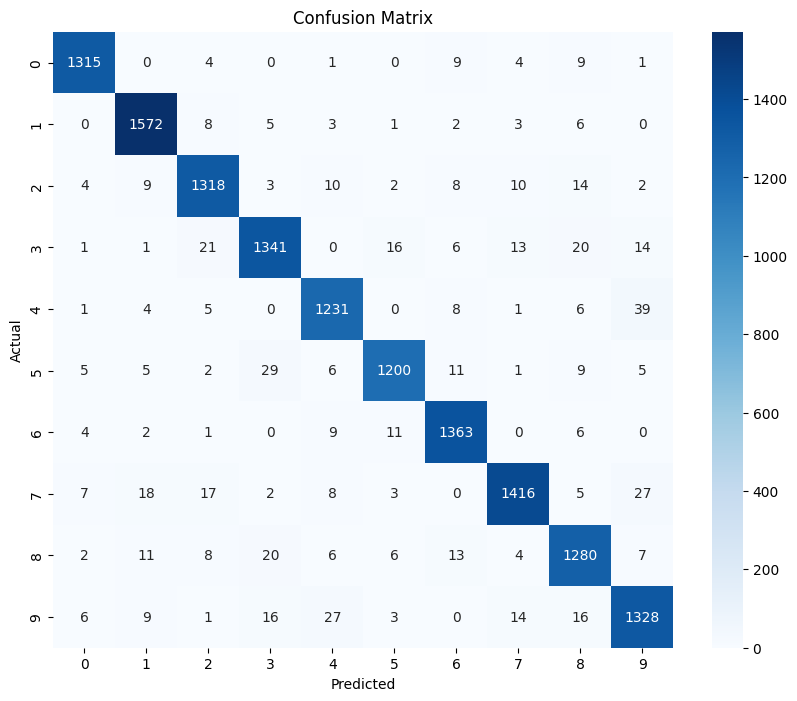

All done!


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

class FeedbackAlignmentMLP:
    def __init__(self, input_size, hidden_size, output_size, sigma=0.01):
        # Forward weights
        self.W = np.random.normal(0, sigma, (input_size, hidden_size))
        self.W_out = np.random.normal(0, sigma, (hidden_size, output_size))

        # Feedback weights (random and fixed)
        self.B = np.random.normal(0, sigma, (output_size, hidden_size))

    def forward(self, X):
        self.h = np.maximum(0, X @ self.W)  # ReLU activation
        self.y_hat = self.h @ self.W_out
        return self.y_hat

    def loss(self, X, targets):
        y_hat = self.forward(X)
        return 0.5 * np.mean(np.sum((targets - y_hat) ** 2, axis=1))

    def feedback_alignment_update(self, X, targets, eta):
        # Forward pass
        y_hat = self.forward(X)

        # Error
        e = targets - y_hat

        # Feedback alignment update
        delta = e @ self.B

        # Weight updates
        dW = eta * (X.T @ (delta * (self.h > 0)))  # ReLU derivative
        dW_out = eta * (self.h.T @ e)

        return dW, dW_out

# Load and preprocess MNIST data
print("Loading MNIST data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

# Initialize model
model = FeedbackAlignmentMLP(784, 500, 10, sigma=0.01)

# Training parameters
epochs = 10
batch_size = 128
eta = 0.001  # learning rate

# Training loop
losses = []
test_accuracies = []

print("Starting training...")
for epoch in range(epochs):
    epoch_losses = []
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train_onehot[i:i+batch_size]

        dW, dW_out = model.feedback_alignment_update(batch_X, batch_y, eta)

        model.W += dW
        model.W_out += dW_out

        batch_loss = model.loss(batch_X, batch_y)
        epoch_losses.append(batch_loss)

        if i % (10 * batch_size) == 0:
            print(f"Epoch {epoch+1}/{epochs}, Batch {i//batch_size}, Loss: {batch_loss:.4f}")

    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)

    # Evaluate on test set
    y_pred = model.forward(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs} completed. Avg Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.4f}")

    # Plot learning curve after each epoch
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epoch+2), losses)
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch+2), test_accuracies)
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

print("Training completed. Generating final visualizations...")

# Final Confusion Matrix
y_pred = model.forward(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("All done!")

Weight Perturbation, Feedback Alignment implemented in harder, more complex learning scenarios

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import shap

class WeightPerturbMLP:
    def __init__(self, input_size, hidden_size, output_size, sigma=0.01):
        self.W_h = np.random.normal(0, sigma, (input_size, hidden_size))
        self.W_y = np.random.normal(0, sigma, (hidden_size, output_size))
        self.sigma = sigma

    def forward(self, X):
        self.h = np.maximum(0, X @ self.W_h)  # ReLU activation
        self.y = self.h @ self.W_y
        return self.y

    def loss(self, X, targets):
        outputs = self.forward(X)
        return np.mean((outputs - targets) ** 2)

    def weight_perturbation(self, X, targets, eta, K):
        base_loss = self.loss(X, targets)

        W_h_update = np.zeros_like(self.W_h)
        W_y_update = np.zeros_like(self.W_y)

        for _ in range(K):
            Psi_h = np.random.normal(0, self.sigma, self.W_h.shape)
            Psi_y = np.random.normal(0, self.sigma, self.W_y.shape)

            W_h_perturbed = self.W_h + Psi_h
            W_y_perturbed = self.W_y + Psi_y

            self.W_h, self.W_y = W_h_perturbed, W_y_perturbed
            perturbed_loss = self.loss(X, targets)
            self.W_h, self.W_y = W_h_perturbed - Psi_h, W_y_perturbed - Psi_y

            delta_loss = perturbed_loss - base_loss

            W_h_update += (delta_loss * Psi_h) / (self.sigma**2)
            W_y_update += (delta_loss * Psi_y) / (self.sigma**2)

        W_h_update *= -eta / K
        W_y_update *= -eta / K

        return W_h_update, W_y_update

class FeedbackAlignmentMLP:
    def __init__(self, input_size, hidden_size, output_size, sigma=0.01):
        self.W = np.random.normal(0, sigma, (input_size, hidden_size))
        self.W_out = np.random.normal(0, sigma, (hidden_size, output_size))
        self.B = np.random.normal(0, sigma, (output_size, hidden_size))

    def forward(self, X):
        self.h = np.maximum(0, X @ self.W)  # ReLU activation
        self.y_hat = self.h @ self.W_out
        return self.y_hat

    def loss(self, X, targets):
        y_hat = self.forward(X)
        return 0.5 * np.mean(np.sum((targets - y_hat) ** 2, axis=1))

    def feedback_alignment_update(self, X, targets, eta):
        y_hat = self.forward(X)
        e = targets - y_hat
        delta = e @ self.B
        dW = eta * (X.T @ (delta * (self.h > 0)))
        dW_out = eta * (self.h.T @ e)
        return dW, dW_out

# Load MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Online Learning Experiment

Epoch 1/5, FA Accuracy: 0.8574, WP Accuracy: 0.1120
Epoch 2/5, FA Accuracy: 0.8894, WP Accuracy: 0.1120
Epoch 3/5, FA Accuracy: 0.9041, WP Accuracy: 0.1120
Epoch 4/5, FA Accuracy: 0.9134, WP Accuracy: 0.1120
Epoch 5/5, FA Accuracy: 0.9195, WP Accuracy: 0.1120


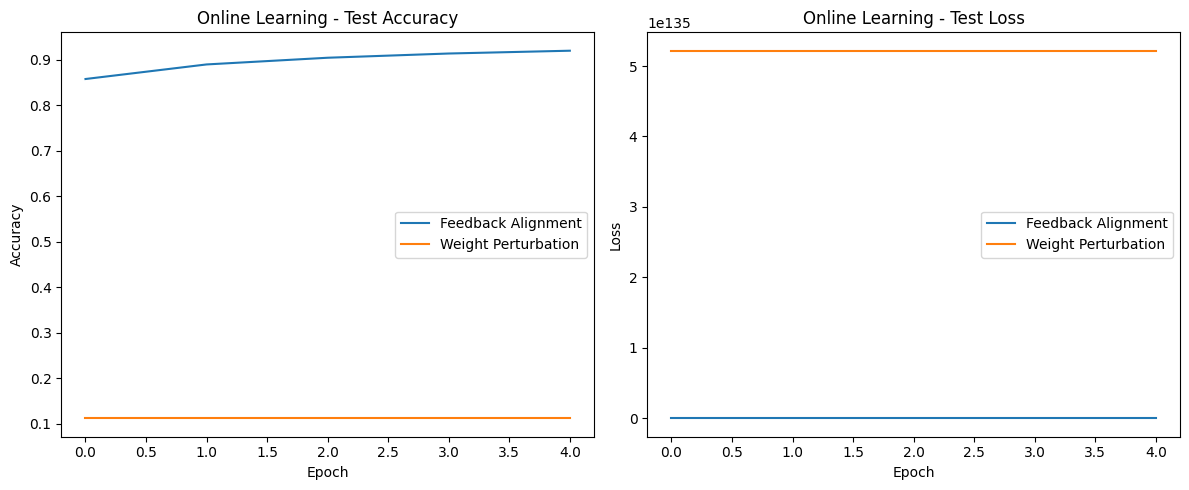

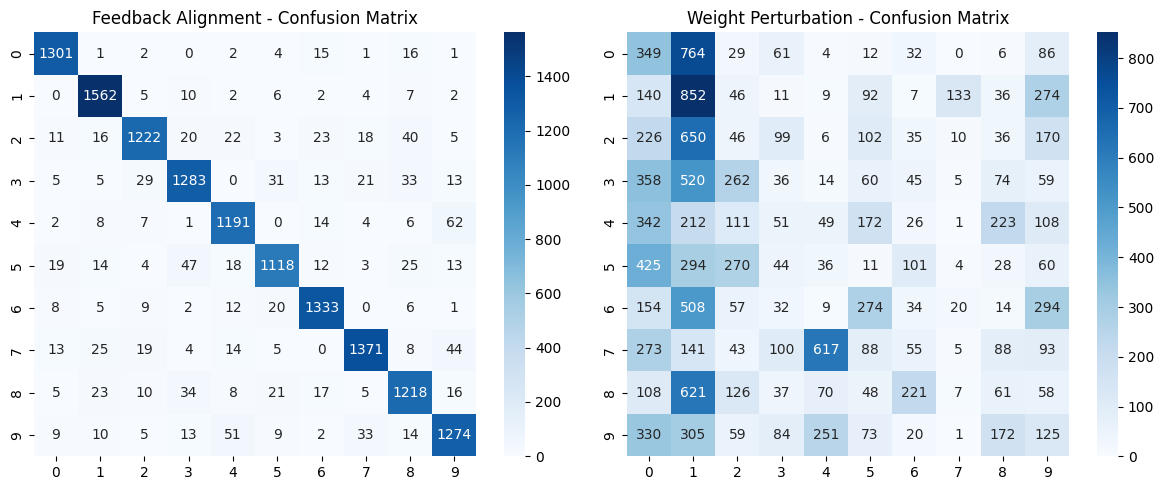

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
import shap

# Assuming WeightPerturbMLP and FeedbackAlignmentMLP classes are defined here

# Load MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.astype(float) / 255.0
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

def online_learning_experiment(X_train, y_train, X_test, y_test, epochs=5):
    fa_model = FeedbackAlignmentMLP(784, 100, 10, sigma=0.01)
    wp_model = WeightPerturbMLP(784, 100, 10, sigma=0.01)

    fa_accuracies = []
    wp_accuracies = []
    fa_losses = []
    wp_losses = []

    for epoch in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)

        for i in range(len(X_train)):
            x = X_train[i:i+1]
            y = y_train[i:i+1]

            dW, dW_out = fa_model.feedback_alignment_update(x, y, eta=0.001)
            fa_model.W += dW
            fa_model.W_out += dW_out

            W_h_update, W_y_update = wp_model.weight_perturbation(x, y, eta=0.001, K=1)
            wp_model.W_h += W_h_update
            wp_model.W_y += W_y_update

        fa_pred = fa_model.forward(X_test)
        fa_acc = np.mean(np.argmax(fa_pred, axis=1) == y_test)
        fa_accuracies.append(fa_acc)
        fa_losses.append(fa_model.loss(X_test, y_test_onehot))

        wp_pred = wp_model.forward(X_test)
        wp_acc = np.mean(np.argmax(wp_pred, axis=1) == y_test)
        wp_accuracies.append(wp_acc)
        wp_losses.append(wp_model.loss(X_test, y_test_onehot))

        print(f"Epoch {epoch+1}/{epochs}, FA Accuracy: {fa_acc:.4f}, WP Accuracy: {wp_acc:.4f}")

    return fa_model, wp_model, fa_accuracies, wp_accuracies, fa_losses, wp_losses

fa_model, wp_model, fa_accuracies, wp_accuracies, fa_losses, wp_losses = online_learning_experiment(X_train, y_train_onehot, X_test, y_test)

# Plot accuracies and losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fa_accuracies, label='Feedback Alignment')
plt.plot(wp_accuracies, label='Weight Perturbation')
plt.title('Online Learning - Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fa_losses, label='Feedback Alignment')
plt.plot(wp_losses, label='Weight Perturbation')
plt.title('Online Learning - Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrices
fa_pred = fa_model.forward(X_test)
wp_pred = wp_model.forward(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, np.argmax(fa_pred, axis=1)), annot=True, fmt='d', cmap='Blues')
plt.title('Feedback Alignment - Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, np.argmax(wp_pred, axis=1)), annot=True, fmt='d', cmap='Blues')
plt.title('Weight Perturbation - Confusion Matrix')

plt.tight_layout()
plt.show()

# SHAP values
explainer_fa = shap.KernelExplainer(fa_model.forward, shap.sample(X_train, 100))
shap_values_fa = explainer_fa.shap_values(X_test[:100])

explainer_wp = shap.KernelExplainer(wp_model.forward, shap.sample(X_train, 100))
shap_values_wp = explainer_wp.shap_values(X_test[:100])

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
shap.summary_plot(shap_values_fa, X_test[:100], plot_type="bar", show=False)
plt.title('Feedback Alignment - SHAP Values')

plt.subplot(1, 2, 2)
shap.summary_plot(shap_values_wp, X_test[:100], plot_type="bar", show=False)
plt.title('Weight Perturbation - SHAP Values')

plt.tight_layout()
plt.show()

# Analysis of Weight Perturbation vs. Feedback Alignment in Online Learning

## 1. Weight Perturbation (WP)

In WP, we estimate the gradient by perturbing the weights and measuring the change in loss. For a single parameter $w_i$, the gradient estimate is:

$$\frac{\partial L}{\partial w_i} \approx \frac{L(w_i + \varepsilon) - L(w_i)}{\varepsilon}$$

where $\varepsilon$ is a small perturbation and $L$ is the loss function.

In the online setting with batch size 1, for a single update:

$$w_i = w_i - \eta \cdot \frac{L(w_i + \varepsilon) - L(w_i)}{\varepsilon}$$

where $\eta$ is the learning rate.

The variance of this estimate for a single sample is high. If we denote the true gradient as $g_i = \frac{\partial L}{\partial w_i}$, the variance of the WP estimate is:

$$\text{Var(WP estimate)} \approx O(\frac{\sigma^2}{\varepsilon^2})$$

where $\sigma^2$ is the variance of the loss function evaluation.

## 2. Feedback Alignment (FA)

In FA, we use a fixed random matrix $B$ instead of the transpose of the weight matrix $W^T$ for backpropagation. The update rule for the last layer in a two-layer network would be:

$$\Delta W = \eta \cdot \delta B^T \cdot x$$

where $\delta = y - \hat{y}$ is the output error, $B$ is the random feedback matrix, and $x$ is the input.

The variance of this estimate depends on the distribution of $B$ and the input $x$, but it doesn't suffer from the $\varepsilon^2$ term in the denominator like WP does.

## 3. Comparison in Online Learning

In online learning, we update after each sample. Let's consider the expected change in the parameter $w_i$ over many updates:

For WP:
$$E[\Delta w_i] \approx \eta \cdot E[\frac{L(w_i + \varepsilon) - L(w_i)}{\varepsilon}] \approx \eta \cdot (\frac{\partial L}{\partial w_i} + O(\varepsilon))$$

For FA:
$$E[\Delta w_i] \approx \eta \cdot E[\delta B_i^T x] \approx \eta \cdot c \cdot \frac{\partial L}{\partial w_i}$$

where $c$ is some constant depending on the correlation between $B$ and $W^T$.

The key difference is in the variance of these updates. For WP, the variance scales with $1/\varepsilon^2$, which can be very large for small $\varepsilon$. For FA, the variance is generally smaller and doesn't have this problematic term.

## 4. Convergence Analysis

In stochastic optimization, the convergence rate depends on both the bias and variance of the gradient estimates. For strongly convex functions, the convergence rate is typically of the form:

$$E[f(w_t) - f(w^*)] \leq O(\frac{\eta^2 \cdot \sigma^2 + b^2}{t})$$

where $\sigma^2$ is the variance of the gradient estimate, $b$ is the bias, and $t$ is the number of iterations.

For WP in online learning, $\sigma^2$ is large due to the $1/\varepsilon^2$ term, potentially leading to slower convergence. FA, while biased due to the random $B$ matrix, may have a more favorable trade-off between bias and variance in this setting.

## 5. Sample Complexity

In online learning, we're concerned with the number of samples needed to achieve a certain error rate. The sample complexity often scales with the variance of the updates. Given the higher variance in WP, we would expect it to require more samples to achieve the same error rate as FA in the online setting.

## Conclusion

This suggests that WP's high-variance gradient estimates in the online setting could lead to slower convergence and higher sample complexity compared to FA. This aligns with the intuition that WP might struggle in online learning scenarios.

Non Stationary Learning Experiment

In [ ]:
def non_stationary_experiment(X_train, y_train, X_test, y_test, epochs=10):
    fa_model = FeedbackAlignmentMLP(784, 100, 10, sigma=0.01)
    wp_model = WeightPerturbMLP(784, 100, 10, sigma=0.01)

    fa_accuracies = []
    wp_accuracies = []
    fa_losses = []
    wp_losses = []

    mask_0_4 = np.isin(y_train, [0, 1, 2, 3, 4])
    mask_5_9 = np.isin(y_train, [5, 6, 7, 8, 9])

    X_train_0_4, y_train_0_4 = X_train[mask_0_4], y_train[mask_0_4]
    X_train_5_9, y_train_5_9 = X_train[mask_5_9], y_train[mask_5_9]

    for epoch in range(epochs):
        if epoch < epochs // 2:
            X_epoch, y_epoch = X_train_0_4, y_train_0_4
        else:
            X_epoch, y_epoch = X_train_5_9, y_train_5_9

        X_epoch, y_epoch = shuffle(X_epoch, y_epoch)

        for i in range(0, len(X_epoch), 32):
            x = X_epoch[i:i+32]
            y = y_epoch[i:i+32]

            dW, dW_out = fa_model.feedback_alignment_update(x, y, eta=0.001)
            fa_model.W += dW
            fa_model.W_out += dW_out

            W_h_update, W_y_update = wp_model.weight_perturbation(x, y, eta=0.001, K=1)
            wp_model.W_h += W_h_update
            wp_model.W_y += W_y_update

        fa_pred = fa_model.forward(X_test)
        fa_acc = np.mean(np.argmax(fa_pred, axis=1) == y_test)
        fa_accuracies.append(fa_acc)
        fa_losses.append(fa_model.loss(X_test, y_test_onehot))

        wp_pred = wp_model.forward(X_test)
        wp_acc = np.mean(np.argmax(wp_pred, axis=1) == y_test)
        wp_accuracies.append(wp_acc)
        wp_losses.append(wp_model.loss(X_test, y_test_onehot))

        print(f"Epoch {epoch+1}/{epochs}, FA Accuracy: {fa_acc:.4f}, WP Accuracy: {wp_acc:.4f}")

    return fa_model, wp_model, fa_accuracies, wp_accuracies, fa_losses, wp_losses

fa_model, wp_model, fa_accuracies, wp_accuracies, fa_losses, wp_losses = non_stationary_experiment(X_train, y_train_onehot, X_test, y_test)

# Plot accuracies and losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fa_accuracies, label='Feedback Alignment')
plt.plot(wp_accuracies, label='Weight Perturbation')
plt.axvline(x=4.5, color='r', linestyle='--', label='Data Shift')
plt.title('Non-stationary Learning - Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fa_losses, label='Feedback Alignment')
plt.plot(wp_losses, label='Weight Perturbation')
plt.axvline(x=4.5, color='r', linestyle='--', label='Data Shift')
plt.title('Non-stationary Learning - Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrices
fa_pred = fa_model.forward(X_test)
wp_pred = wp_model.forward(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, np.argmax(fa_pred, axis=1)), annot=True, fmt='d', cmap='Blues')
plt.title('Feedback Alignment - Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, np.argmax(wp_pred, axis=1)), annot=True, fmt='d', cmap='Blues')
plt.title('Weight Perturbation - Confusion Matrix')

plt.tight_layout()
plt.show()

# SHAP values
explainer_fa = shap.KernelExplainer(fa_model.forward, shap.sample(X_train, 100))
shap_values_fa = explainer_fa.shap_values(X_test[:100])

explainer_wp = shap.KernelExplainer(wp_model.forward, shap.sample(X_train, 100))
shap_values_wp = explainer_wp.shap_values(X_test[:100])

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
shap.summary_plot(shap_values_fa, X_test[:100], plot_type="bar", show=False)
plt.title('Feedback Alignment - SHAP Values')

plt.subplot(1, 2, 2)
shap.summary_plot(shap_values_wp, X_test[:100], plot_type="bar", show=False)
plt.title('Weight Perturbation - SHAP Values')

plt.tight_layout()
plt.show()

# Weight Perturbation vs. Feedback Alignment in Non-stationary Learning

## 1. Non-stationary Learning Model

In non-stationary learning, the underlying distribution of the data changes over time:

$P_t(x, y) \neq P_s(x, y)$ for $t \neq s$

where $P_t$ is the joint distribution of inputs $x$ and targets $y$ at time $t$.

## 2. Regret Analysis

We use dynamic regret as a performance measure:

$R_T = \sum_{t=1}^T [f_t(w_t) - f_t(w_t^*)]$

where $f_t$ is the loss function at time $t$, $w_t$ is the model's parameters at time $t$, and $w_t^*$ is the optimal parameters for $f_t$.

## 3. Weight Perturbation (WP) in Non-stationary Environments

WP estimates gradients by:

$\nabla f_t(w_t) \approx \frac{f_t(w_t + \varepsilon) - f_t(w_t)}{\varepsilon}$

Challenges:
a) High variance due to single-sample estimation
b) Estimates may quickly become outdated as the underlying distribution changes

Regret bound for WP:

$R_T \leq O(\sqrt{T(1 + V_T)}) + O(T\varepsilon) + O(\frac{T}{\varepsilon^2})$

where $V_T$ is the total variation in optimal parameters over $T$ time steps.

## 4. Feedback Alignment (FA) in Non-stationary Environments

FA uses a fixed random matrix $B$ for backward propagation:

$\nabla f_t(w_t) \approx B \cdot \delta_t$

where $\delta_t$ is the error at the output layer.

Regret bound for FA:

$R_T \leq O(\sqrt{T(1 + V_T)}) + O(T\|B - W^T\|_F)$

where $\|B - W^T\|_F$ is the Frobenius norm of the difference between $B$ and the true backward weights.

## 5. Comparison in Non-stationary Environments

### a) Adaptation Speed
- WP: Slow due to high-variance estimates and multiple forward passes.
- FA: Faster, requiring only one forward and one backward pass.

### b) Tracking Ability
- WP: May struggle with rapid changes due to reliance on finite differences.
- FA: More consistent update directions may allow better tracking of non-stationary optima.

### c) Stability
- WP: High variance in updates may lead to instability.
- FA: More stable updates due to fixed feedback matrix.

### d) Bias-Variance Trade-off
- WP: Low bias but high variance, problematic with shifting optimal parameters.
- FA: Higher bias (due to fixed B) but lower variance, potentially better for tracking non-stationary optima.

## 6. Mathematical Intuition

Taylor expansion of the loss function:

$f_t(w) \approx f_t(w_t) + \nabla f_t(w_t)^T(w - w_t) + \frac{1}{2}(w - w_t)^T\nabla^2f_t(w_t)(w - w_t)$

In non-stationary environments, $\nabla f_t$ and $\nabla^2 f_t$ change over time. FA's consistent update direction might better capture this changing landscape compared to WP's high-variance estimates.

## 7. Convergence in Expectation

For convex loss functions $f_t$:

$E[\|w_t - w_t^*\|^2] \leq (1 - \eta\lambda)E[\|w_{t-1} - w_{t-1}^*\|^2] + \eta^2\sigma^2 + 2\eta\|w_t^* - w_{t-1}^*\|$

where $\lambda$ is the strong convexity parameter, $\eta$ is the learning rate, and $\sigma^2$ is the gradient estimate variance.

WP's large $\sigma^2$ may lead to larger deviations from the moving optimum. FA's lower-variance updates might allow it to stay closer to the changing optimum on average.

## Conclusion

While both WP and FA face challenges in non-stationary environments, FA might have advantages due to its ability to provide more stable, albeit biased, updates. This could allow FA to better track changing optimal parameters. However, actual performance depends on the specific nature of non-stationarity and chosen hyperparameters.